In [306]:
import os
from datetime import datetime
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('future.no_silent_downcasting', True)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MaxAbsScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
import itertools

In [307]:
data = pd.read_csv("data/2024-06-15_17-29-01_unscaled_totalPuracheses-Purchasesweb-store-catalog.csv", sep="\t")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2208


,ID,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebVisitsMonth,Complain,Age,Marital_Categories,Edu_Categories,Spent_Total,Living_Alone,Having_Kids,AcceptedOffer,Total_Purchases
0,5524,58138.0,734750,58,635,88,546,172,88,88,...,7,0,58,0,1,1617,0,0,1,22
1,2174,46344.0,735300,38,11,1,6,2,1,6,...,5,0,61,0,1,27,1,1,0,4
2,4141,71613.0,735101,26,426,49,127,111,21,42,...,4,0,50,1,1,776,1,0,0,20
3,6182,26646.0,735274,26,11,4,20,10,3,5,...,6,0,31,1,1,53,1,1,0,6
4,5324,58293.0,735252,94,173,43,118,46,27,15,...,5,0,34,1,3,422,1,1,0,14


In [308]:
print(data['Complain'].unique())

[0 1]


In [309]:
def boxplot (column):
    # Assuming 'data' is your DataFrame and it has a column named 'Income'
    sns.boxplot(y=data[column])
    # Adding titles and labels
    plt.title(f'Box Plot of ' + column)
    plt.ylabel(column)
    # Show the plot
    plt.show()

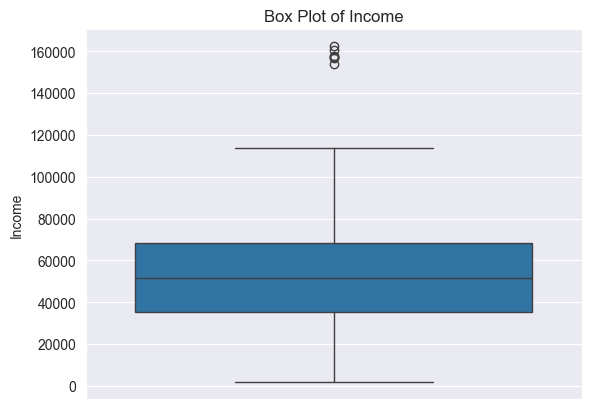

In [310]:
boxplot('Income')

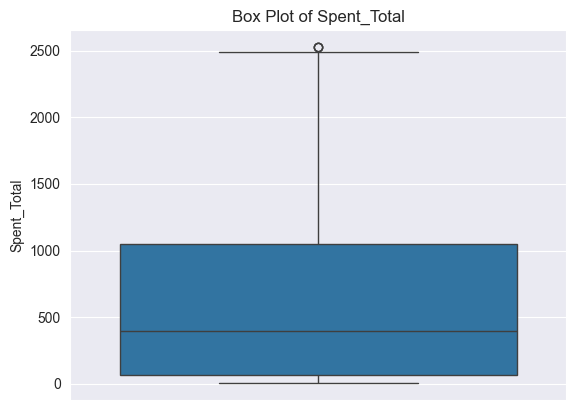

In [311]:
boxplot('Spent_Total')

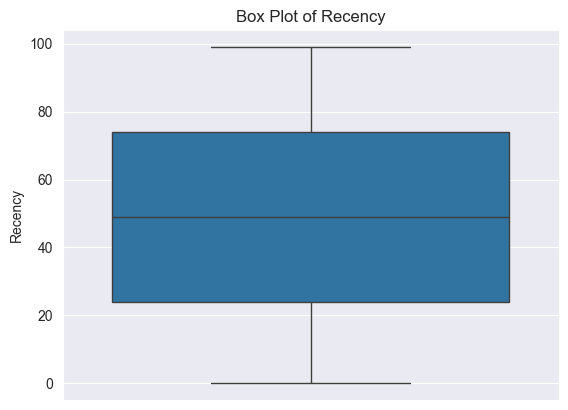

In [312]:
boxplot('Recency')

In [313]:
#Scaling
max_abs_scaler = MaxAbsScaler()
data_maxabs = max_abs_scaler.fit_transform(data)

In [314]:
eps = 0.975
min_samples = len(data.columns) * 2
dbscan = DBSCAN(eps = eps, min_samples = min_samples)
data_dbscan = data
data_dbscan['Cluster'] = dbscan.fit_predict(data_maxabs)
clusters_dbscan = data_dbscan['Cluster'].unique()

In [315]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
data_kmeans = data
data_kmeans['Cluster'] = kmeans.fit_predict(data_maxabs)
clusters_kmeans = data_kmeans['Cluster'].unique()

In [316]:
cluster_dfs = {}
for cluster in clusters_kmeans:
    cluster_dfs[cluster] = data_kmeans[data_kmeans['Cluster'] == cluster].reset_index(drop=True)

In [317]:
cluster_0_df = cluster_dfs[0]
cluster_1_df = cluster_dfs[1]
cluster_2_df = cluster_dfs[2]
cluster_3_df = cluster_dfs[3]

In [364]:
def plot_cardinality_cluster_kmeans_number_new(data, k):
    X = data
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    unique_labels = sorted(set(labels))

    cardinality = [list(labels).count(label) for label in unique_labels]
    clusters = ['Noise' if label == -1 else f'Cluster {label}' for label in unique_labels]
    
    # Get a color palette with enough colors
    palette = sns.color_palette('viridis', len(unique_labels))

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=clusters, y=cardinality, palette=palette)

    for index, value in enumerate(cardinality):
        ax.text(index, value, str(value), ha='center', va='bottom')
    
    plt.title('Cardinality of Each Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Points')
    plt.savefig('cardinality_cluster_kmeans_number.png')
    plt.show()

/var/folders/6n/xwm6w0015417z1bwqghfk2_c0000gn/T/ipykernel_25120/3696631795.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=clusters, y=cardinality, palette=palette)


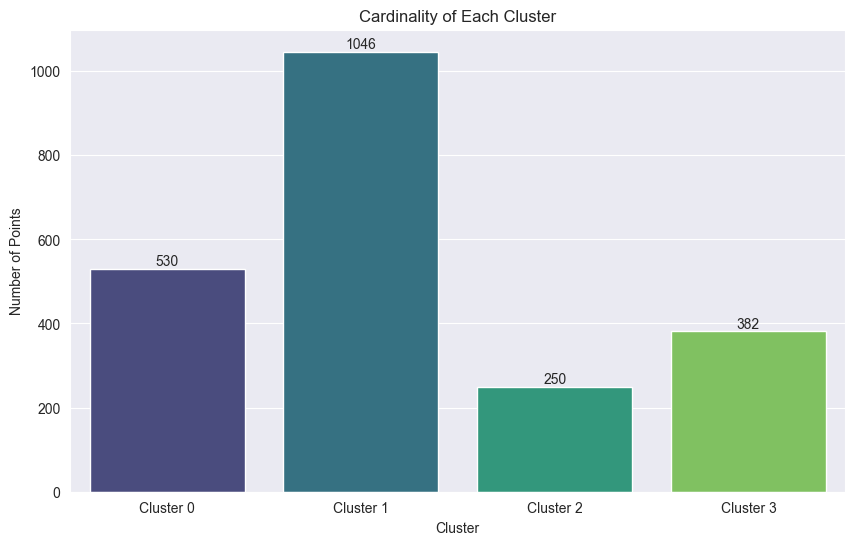

In [366]:
plot_cardinality_cluster_kmeans_number_new(data_maxabs, 4)

In [375]:
def plot_cardinality_cluster_dbscan(data, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data)
    unique_labels = set(labels)
    if len(unique_labels) > 1:
        n_clusters = len(set(labels))
        n_noise = list(labels).count(-1)

    cardinality = [list(labels).count(label) for label in unique_labels]
    clusters = ['Noise' if label == -1 else f'Cluster {label}' for label in unique_labels]
    
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=clusters, y=cardinality, palette='viridis')
    
    for index, value in enumerate(cardinality):
        ax.text(index, value, str(value), ha='center', va='bottom')
    
    plt.title('Cardinality of Each Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Points')
    plt.savefig('cardinality_cluster_dbscan.png')
    plt.show()

/var/folders/6n/xwm6w0015417z1bwqghfk2_c0000gn/T/ipykernel_25120/1084029013.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=clusters, y=cardinality, palette='viridis')


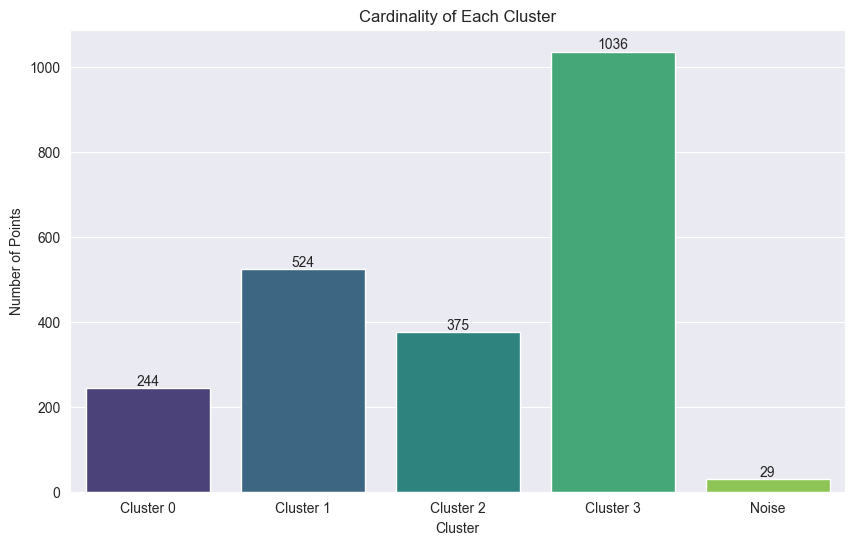

In [380]:
plot_cardinality_cluster_dbscan(data_maxabs, 1, len(data.columns) * 2)

Cross-tabulation of DBSCAN and KMeans cluster assignments:
KMeans    0     1    2    3
DBSCAN                     
-1        6    12    6    5
 0        0     0  244    0
 1      524     0    0    0
 2        0     0    0  375
 3        0  1034    0    2
Indices of the outliers labeled in cluster 3 by both DBSCAN and KMeans:
Index([908, 994], dtype='int64')


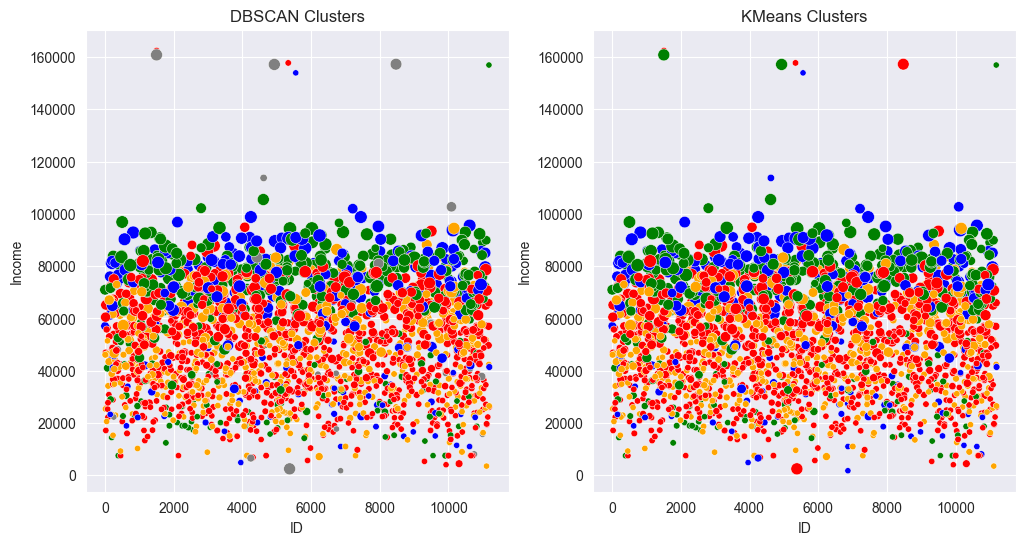

In [379]:
#DBSCAN clustering
eps = 1
min_samples = len(data.columns) * 2
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data_dbscan = data.copy()
data_dbscan['Cluster_DBSCAN'] = dbscan.fit_predict(data_maxabs)

#KMeans clustering
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
data_kmeans = data.copy()
data_kmeans['Cluster_KMeans'] = kmeans.fit_predict(data_maxabs)
KMEans_centroids = kmeans.cluster_centers_

#Merge the results
data_combined = data.copy()
data_combined['Cluster_DBSCAN'] = data_dbscan['Cluster_DBSCAN']
data_combined['Cluster_KMeans'] = data_kmeans['Cluster_KMeans']

#Analyze the results
crosstab = pd.crosstab(data_combined['Cluster_DBSCAN'], data_combined['Cluster_KMeans'], rownames=['DBSCAN'], colnames=['KMeans'])

# Display the crosstab
print("Cross-tabulation of DBSCAN and KMeans cluster assignments:")
print(crosstab)

# Find the indices of the points where both DBSCAN and KMeans assigned the cluster label 3
outlier_indices = data_combined[(data_combined['Cluster_DBSCAN'] == 3) & (data_combined['Cluster_KMeans'] == 3)].index

# Display the indices
print("Indices of the outliers labeled in cluster 3 by both DBSCAN and KMeans:")
print(outlier_indices)
# Scatter plot colored by DBSCAN clusters
paletteDB = {-1: 'gray', 0: 'blue', 1: 'orange', 2: 'green', 3: 'red'}
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=data_combined, x=data_combined.columns[0], y=data_combined.columns[1], hue='Cluster_DBSCAN', palette= paletteDB, size='Spent_Total', sizes=(20, 100), legend=None)
plt.title('DBSCAN Clusters')

# Scatter plot colored by KMeans clusters
paletteK = { 0: 'orange', 1: 'red', 2: 'blue', 3: 'green'}
plt.subplot(1, 2, 2)
sns.scatterplot(data=data_combined, x=data_combined.columns[0], y=data_combined.columns[1], hue='Cluster_KMeans', palette= paletteK, size='Spent_Total', sizes=(20, 100), legend=None)
plt.title('KMeans Clusters')

plt.savefig('KMeansVSDBScan.png')
plt.show()

In [247]:
income_medians = {
    'Cluster 0': cluster_0_df['Income'].median(),
    'Cluster 1': cluster_1_df['Income'].median(),
    'Cluster 2': cluster_2_df['Income'].median(),
    'Cluster 3': cluster_3_df['Income'].median()
}
age_medians = {
    'Cluster 0': cluster_0_df['Age'].median(),
    'Cluster 1': cluster_1_df['Age'].median(),
    'Cluster 2': cluster_2_df['Age'].median(),
    'Cluster 3': cluster_3_df['Age'].median()
}
SpentTotal_medians = {
    'Cluster 0': cluster_0_df['Spent_Total'].median(),
    'Cluster 1': cluster_1_df['Spent_Total'].median(),
    'Cluster 2': cluster_2_df['Spent_Total'].median(),
    'Cluster 3': cluster_3_df['Spent_Total'].median()
}

NumWebVisitsMonth_medians = {
    'Cluster 0': cluster_0_df['NumWebVisitsMonth'].median(),
    'Cluster 1': cluster_1_df['NumWebVisitsMonth'].median(),
    'Cluster 2': cluster_2_df['NumWebVisitsMonth'].median(),
    'Cluster 3': cluster_3_df['NumWebVisitsMonth'].median()
}

Total_Purchases_medians = {
    'Cluster 0': cluster_0_df['Total_Purchases'].median(),
    'Cluster 1': cluster_1_df['Total_Purchases'].median(),
    'Cluster 2': cluster_2_df['Total_Purchases'].median(),
    'Cluster 3': cluster_3_df['Total_Purchases'].median()
}

NumDealsPurchases_medians = {
    'Cluster 0': cluster_0_df['NumDealsPurchases'].median(),
    'Cluster 1': cluster_1_df['NumDealsPurchases'].median(),
    'Cluster 2': cluster_2_df['NumDealsPurchases'].median(),
    'Cluster 3': cluster_3_df['NumDealsPurchases'].median()
}


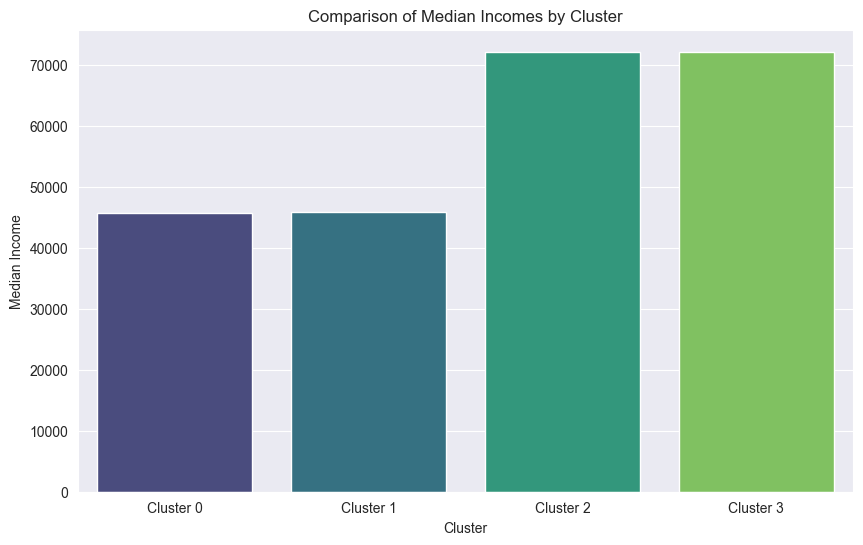

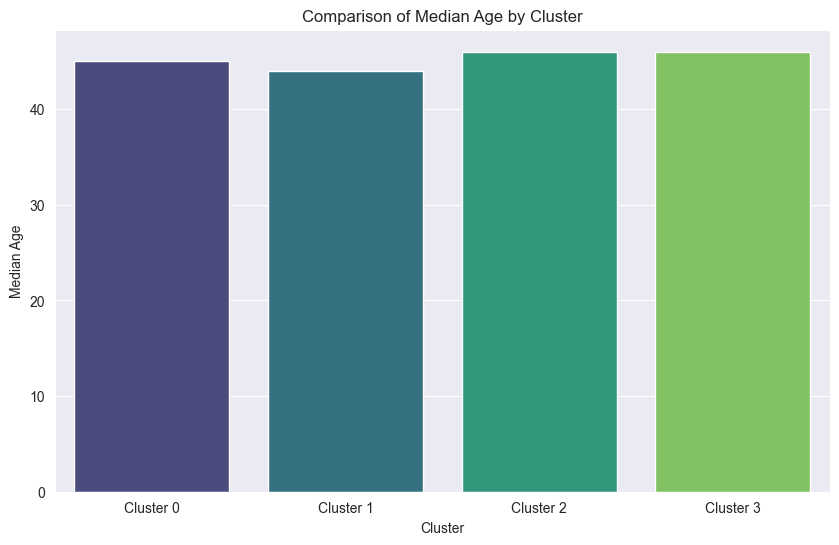

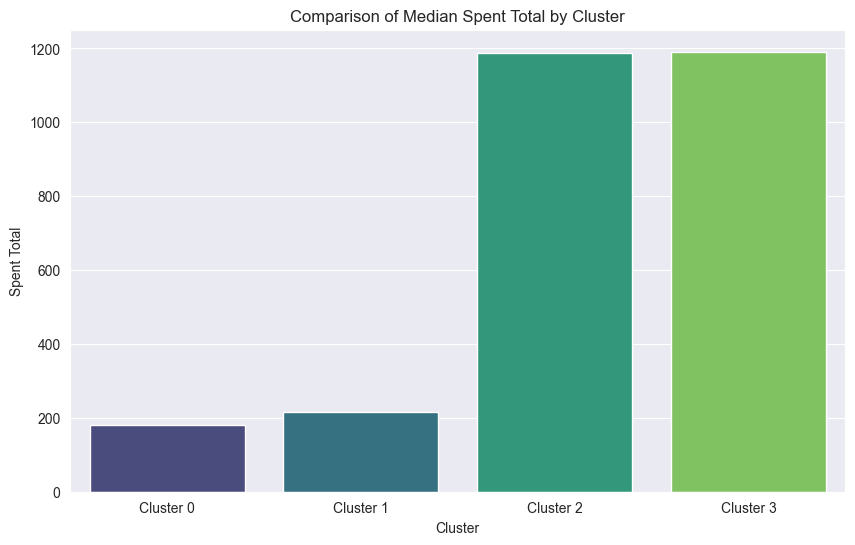

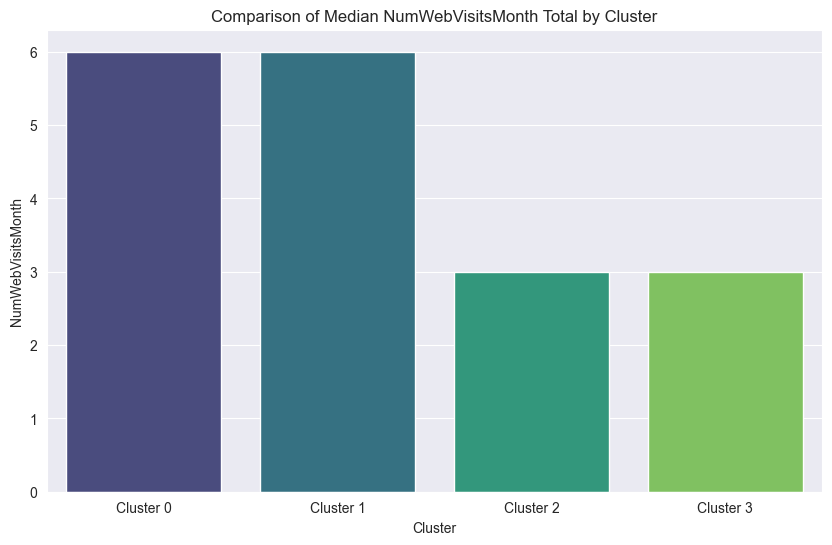

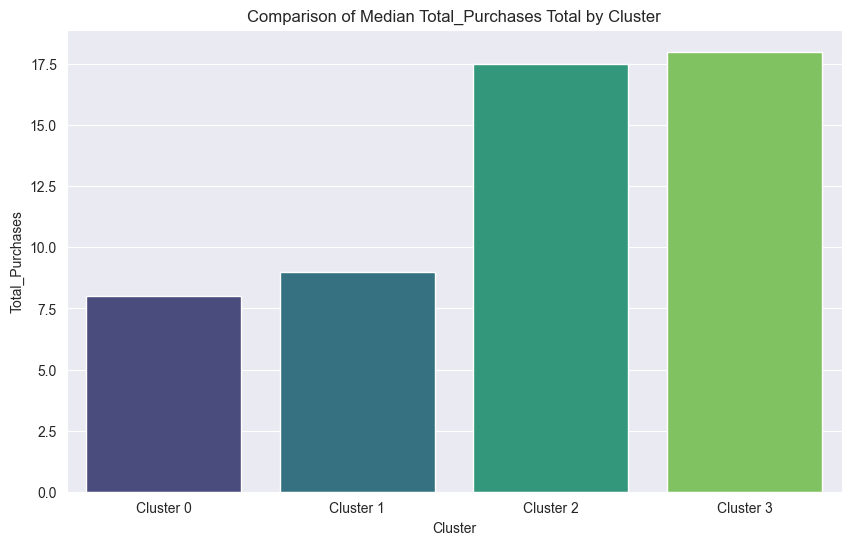

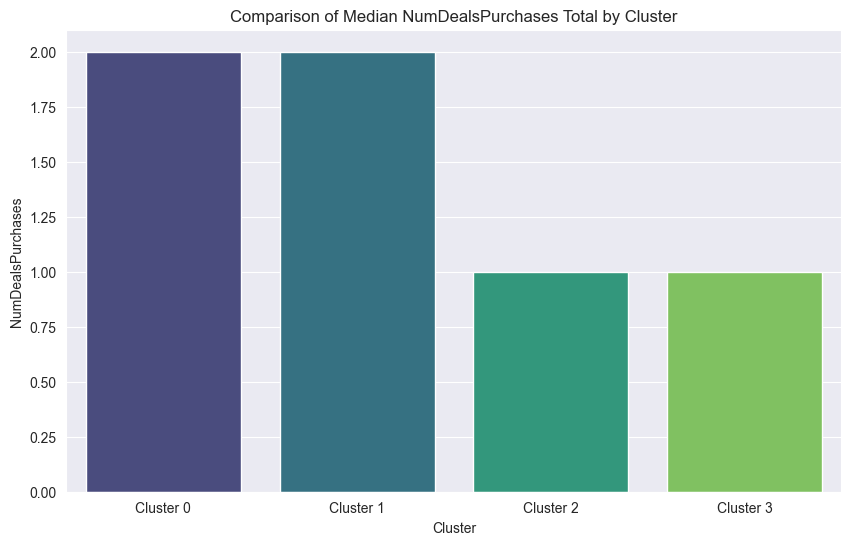

In [248]:
income_medians_df = pd.DataFrame(list(income_medians.items()), columns=['Cluster', 'Median Income'])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Median Income', data=income_medians_df, palette='viridis', hue='Cluster', legend=False)
plt.title('Comparison of Median Incomes by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Median Income')
plt.show()

age_medians_df = pd.DataFrame(list(age_medians.items()), columns=['Cluster', 'Median Age'])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Median Age', data=age_medians_df, palette='viridis', hue='Cluster', legend=False)
plt.title('Comparison of Median Age by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Median Age')
plt.show()

Spent_Total_df = pd.DataFrame(list(SpentTotal_medians.items()), columns=['Cluster', 'Median Spent Total'])
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Median Spent Total', data=Spent_Total_df, palette='viridis', hue='Cluster', legend=False)
plt.title('Comparison of Median Spent Total by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Spent Total')
plt.show()

NumWebVisitsMonth_df = pd.DataFrame(list(NumWebVisitsMonth_medians.items()), columns=['Cluster', 'Median NumWebVisitsMonth'])
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Median NumWebVisitsMonth', data=NumWebVisitsMonth_df, palette='viridis', hue='Cluster', legend=False)
plt.title('Comparison of Median NumWebVisitsMonth Total by Cluster')
plt.xlabel('Cluster')
plt.ylabel('NumWebVisitsMonth')
plt.show()

Total_Purchases_df = pd.DataFrame(list(Total_Purchases_medians.items()), columns=['Cluster', 'Median Total_Purchases'])
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Median Total_Purchases', data=Total_Purchases_df, palette='viridis', hue='Cluster', legend=False)
plt.title('Comparison of Median Total_Purchases Total by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total_Purchases')
plt.show()

NumDealsPurchases_df = pd.DataFrame(list(NumDealsPurchases_medians.items()), columns=['Cluster', 'Median NumDealsPurchases'])
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Median NumDealsPurchases', data=NumDealsPurchases_df, palette='viridis', hue='Cluster', legend=False)
plt.title('Comparison of Median NumDealsPurchases Total by Cluster')
plt.xlabel('Cluster')
plt.ylabel('NumDealsPurchases')
plt.show()


In [249]:
MntWines_medians = {
    'Cluster 0': cluster_0_df['MntWines'].median(),
    'Cluster 1': cluster_1_df['MntWines'].median(),
    'Cluster 2': cluster_2_df['MntWines'].median(),
    'Cluster 3': cluster_3_df['MntWines'].median()
}

MntFruits_medians = {
    'Cluster 0': cluster_0_df['MntFruits'].median(),
    'Cluster 1': cluster_1_df['MntFruits'].median(),
    'Cluster 2': cluster_2_df['MntFruits'].median(),
    'Cluster 3': cluster_3_df['MntFruits'].median()
}

MntMeatProducts_medians = {
    'Cluster 0': cluster_0_df['MntMeatProducts'].median(),
    'Cluster 1': cluster_1_df['MntMeatProducts'].median(),
    'Cluster 2': cluster_2_df['MntMeatProducts'].median(),
    'Cluster 3': cluster_3_df['MntMeatProducts'].median()
}

MntFishProducts_medians = {
    'Cluster 0': cluster_0_df['MntFishProducts'].median(),
    'Cluster 1': cluster_1_df['MntFishProducts'].median(),
    'Cluster 2': cluster_2_df['MntFishProducts'].median(),
    'Cluster 3': cluster_3_df['MntFishProducts'].median()
}

MntSweetProducts_medians = {
    'Cluster 0': cluster_0_df['MntSweetProducts'].median(),
    'Cluster 1': cluster_1_df['MntSweetProducts'].median(),
    'Cluster 2': cluster_2_df['MntSweetProducts'].median(),
    'Cluster 3': cluster_3_df['MntSweetProducts'].median()
}

MntGoldProds_medians = {
    'Cluster 0': cluster_0_df['MntGoldProds'].median(),
    'Cluster 1': cluster_1_df['MntGoldProds'].median(),
    'Cluster 2': cluster_2_df['MntGoldProds'].median(),
    'Cluster 3': cluster_3_df['MntGoldProds'].median()
}

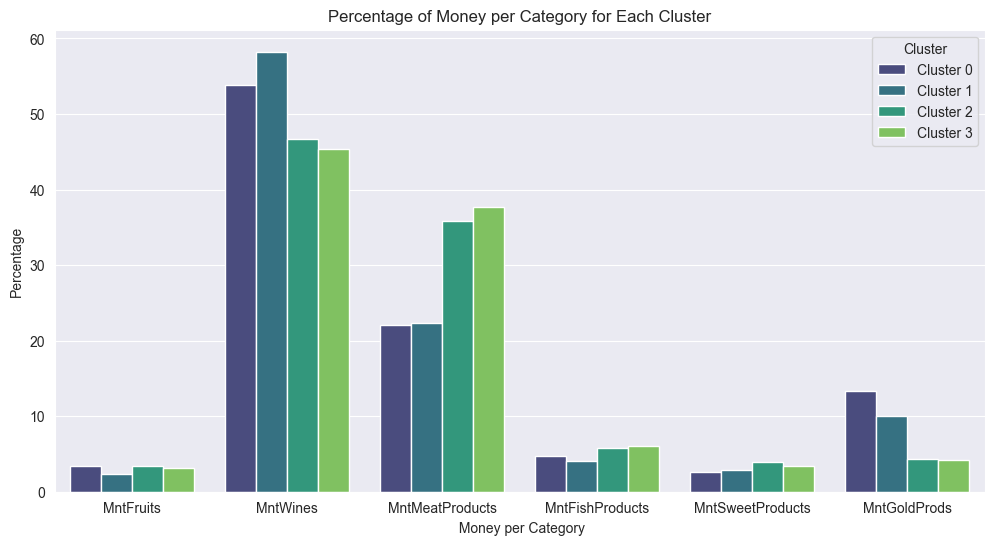

In [250]:
clusters = [cluster_0_df, cluster_1_df, cluster_2_df, cluster_3_df]
columns = ['MntFruits', 'MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Create a list to hold the median data for each cluster
median_data = []

# Calculate medians for each cluster and sum of medians
for i, cluster_df in enumerate(clusters):
    medians = cluster_df[columns].median()
    total_median = medians.sum() 
    percentage_medians = (medians / total_median) * 100
    median_data.append(percentage_medians)

median_df = pd.DataFrame(median_data, index=[f'Cluster {i}' for i in range(len(clusters))])

# Melt the DataFrame 
median_df_melted = median_df.reset_index().melt(id_vars='index', var_name='Money per Category', value_name='Percentage')
median_df_melted.rename(columns={'index': 'Cluster'}, inplace=True)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x= 'Money per Category', y='Percentage', hue='Cluster', data=median_df_melted, palette='viridis')
plt.title('Percentage of Money per Category for Each Cluster')
plt.xlabel(' Money per Category')
plt.ylabel('Percentage')
plt.savefig('Money_per_CategoryInPercent.png')
plt.show()

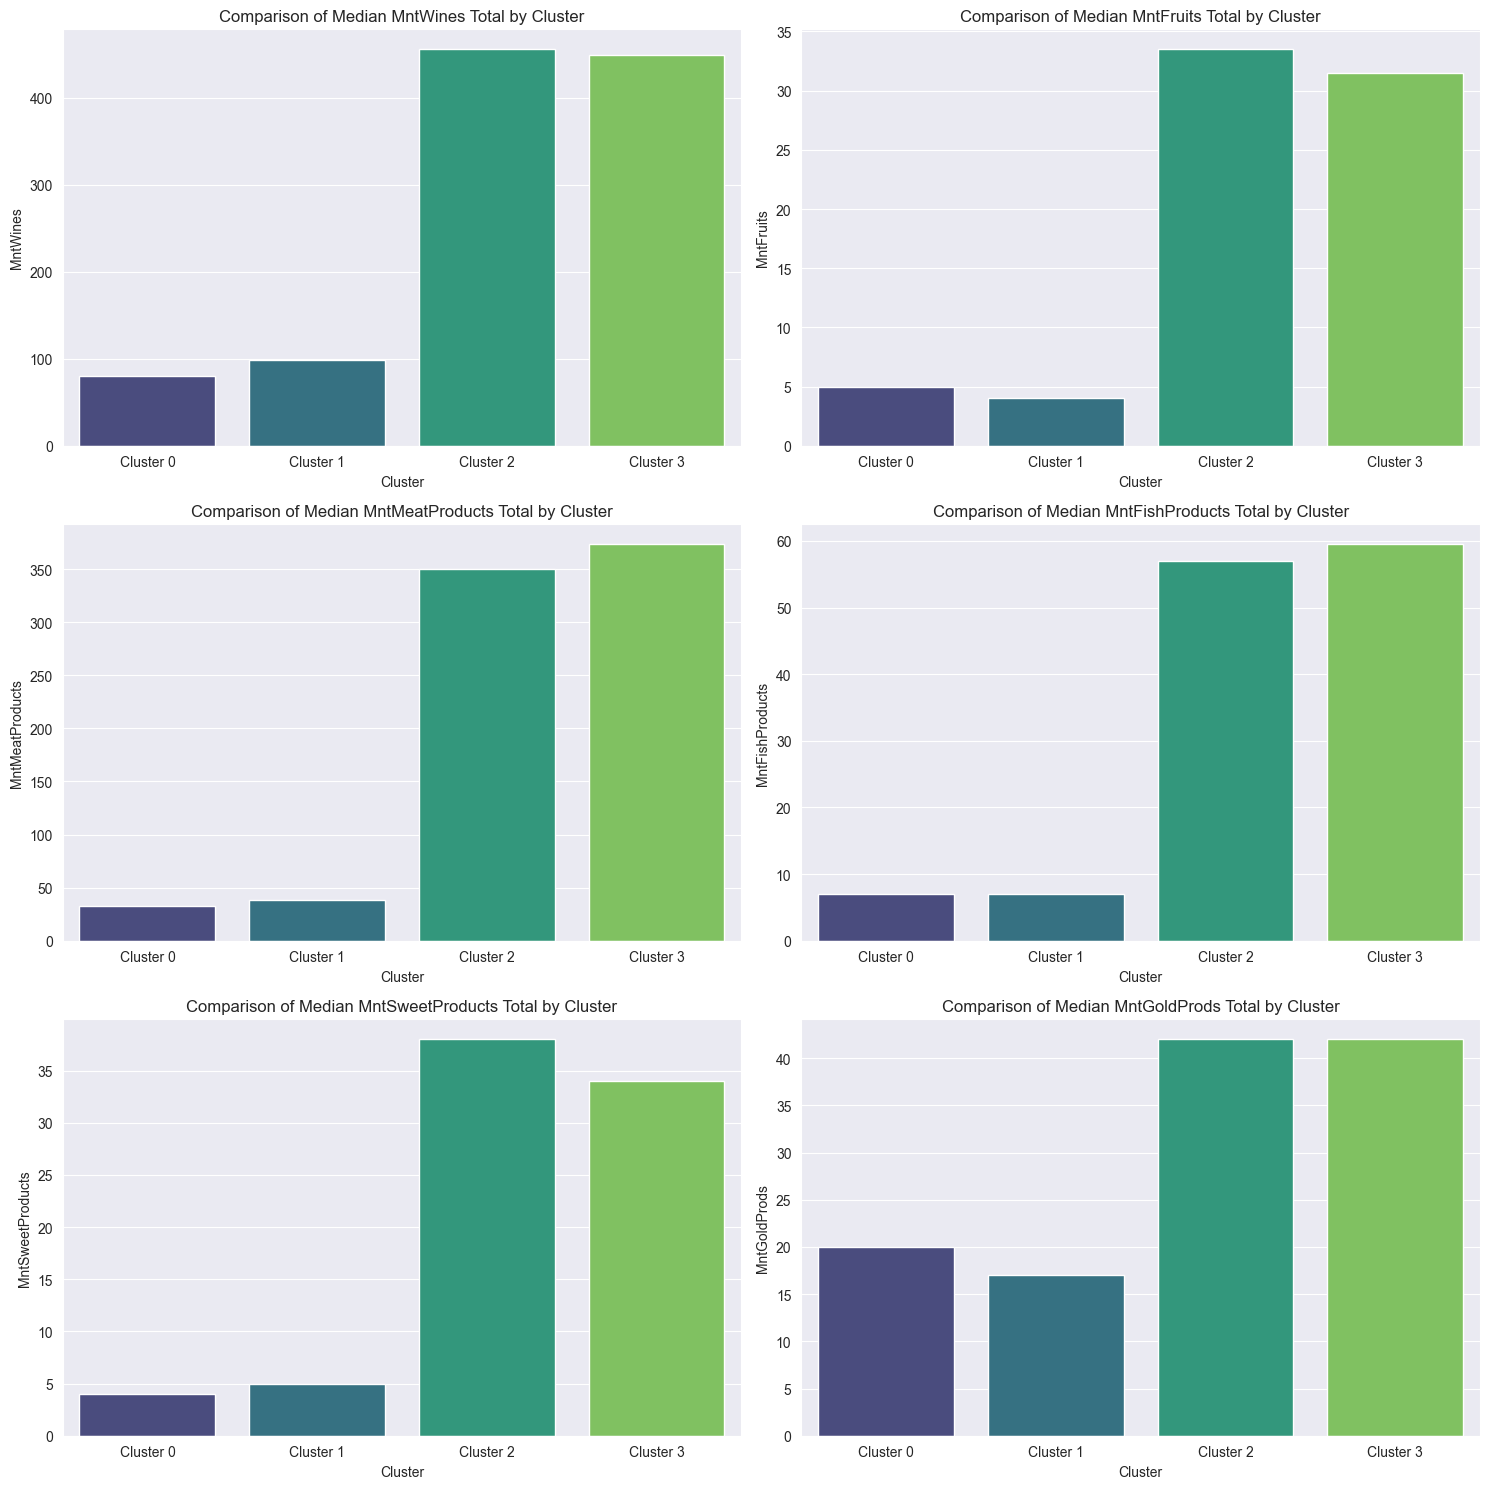

In [251]:
MntWines_df = pd.DataFrame(list(MntWines_medians.items()), columns=['Cluster', 'Median MntWines'])
MntFruits_df = pd.DataFrame(list(MntFruits_medians.items()), columns=['Cluster', 'Median MntFruits'])
MntMeatProducts_df = pd.DataFrame(list(MntMeatProducts_medians.items()), columns=['Cluster', 'Median MntMeatProducts'])
MntFishProducts_df = pd.DataFrame(list(MntFishProducts_medians.items()), columns=['Cluster', 'Median MntFishProducts'])
MntSweetProducts_df = pd.DataFrame(list(MntSweetProducts_medians.items()), columns=['Cluster', 'Median MntSweetProducts'])
MntGoldProds_df = pd.DataFrame(list(MntGoldProds_medians.items()), columns=['Cluster', 'Median MntGoldProds'])

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

sns.barplot(ax=axes[0, 0], x='Cluster', y='Median MntWines', data=MntWines_df, palette='viridis', hue='Cluster', legend=False)
axes[0, 0].set_title('Comparison of Median MntWines Total by Cluster')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('MntWines')

sns.barplot(ax=axes[0, 1], x='Cluster', y='Median MntFruits', data=MntFruits_df, palette='viridis', hue='Cluster', legend=False)
axes[0, 1].set_title('Comparison of Median MntFruits Total by Cluster')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('MntFruits')

sns.barplot(ax=axes[1, 0], x='Cluster', y='Median MntMeatProducts', data=MntMeatProducts_df, palette='viridis', hue='Cluster', legend=False)
axes[1, 0].set_title('Comparison of Median MntMeatProducts Total by Cluster')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('MntMeatProducts')

sns.barplot(ax=axes[1, 1], x='Cluster', y='Median MntFishProducts', data=MntFishProducts_df, palette='viridis', hue='Cluster', legend=False)
axes[1, 1].set_title('Comparison of Median MntFishProducts Total by Cluster')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('MntFishProducts')

sns.barplot(ax=axes[2, 0], x='Cluster', y='Median MntSweetProducts', data=MntSweetProducts_df, palette='viridis', hue='Cluster', legend=False)
axes[2, 0].set_title('Comparison of Median MntSweetProducts Total by Cluster')
axes[2, 0].set_xlabel('Cluster')
axes[2, 0].set_ylabel('MntSweetProducts')

sns.barplot(ax=axes[2, 1], x='Cluster', y='Median MntGoldProds', data=MntGoldProds_df, palette='viridis', hue='Cluster', legend=False)
axes[2, 1].set_title('Comparison of Median MntGoldProds Total by Cluster')
axes[2, 1].set_xlabel('Cluster')
axes[2, 1].set_ylabel('MntGoldProds')

plt.tight_layout()
plt.savefig('OverviewAmountSpent.png')
plt.show()


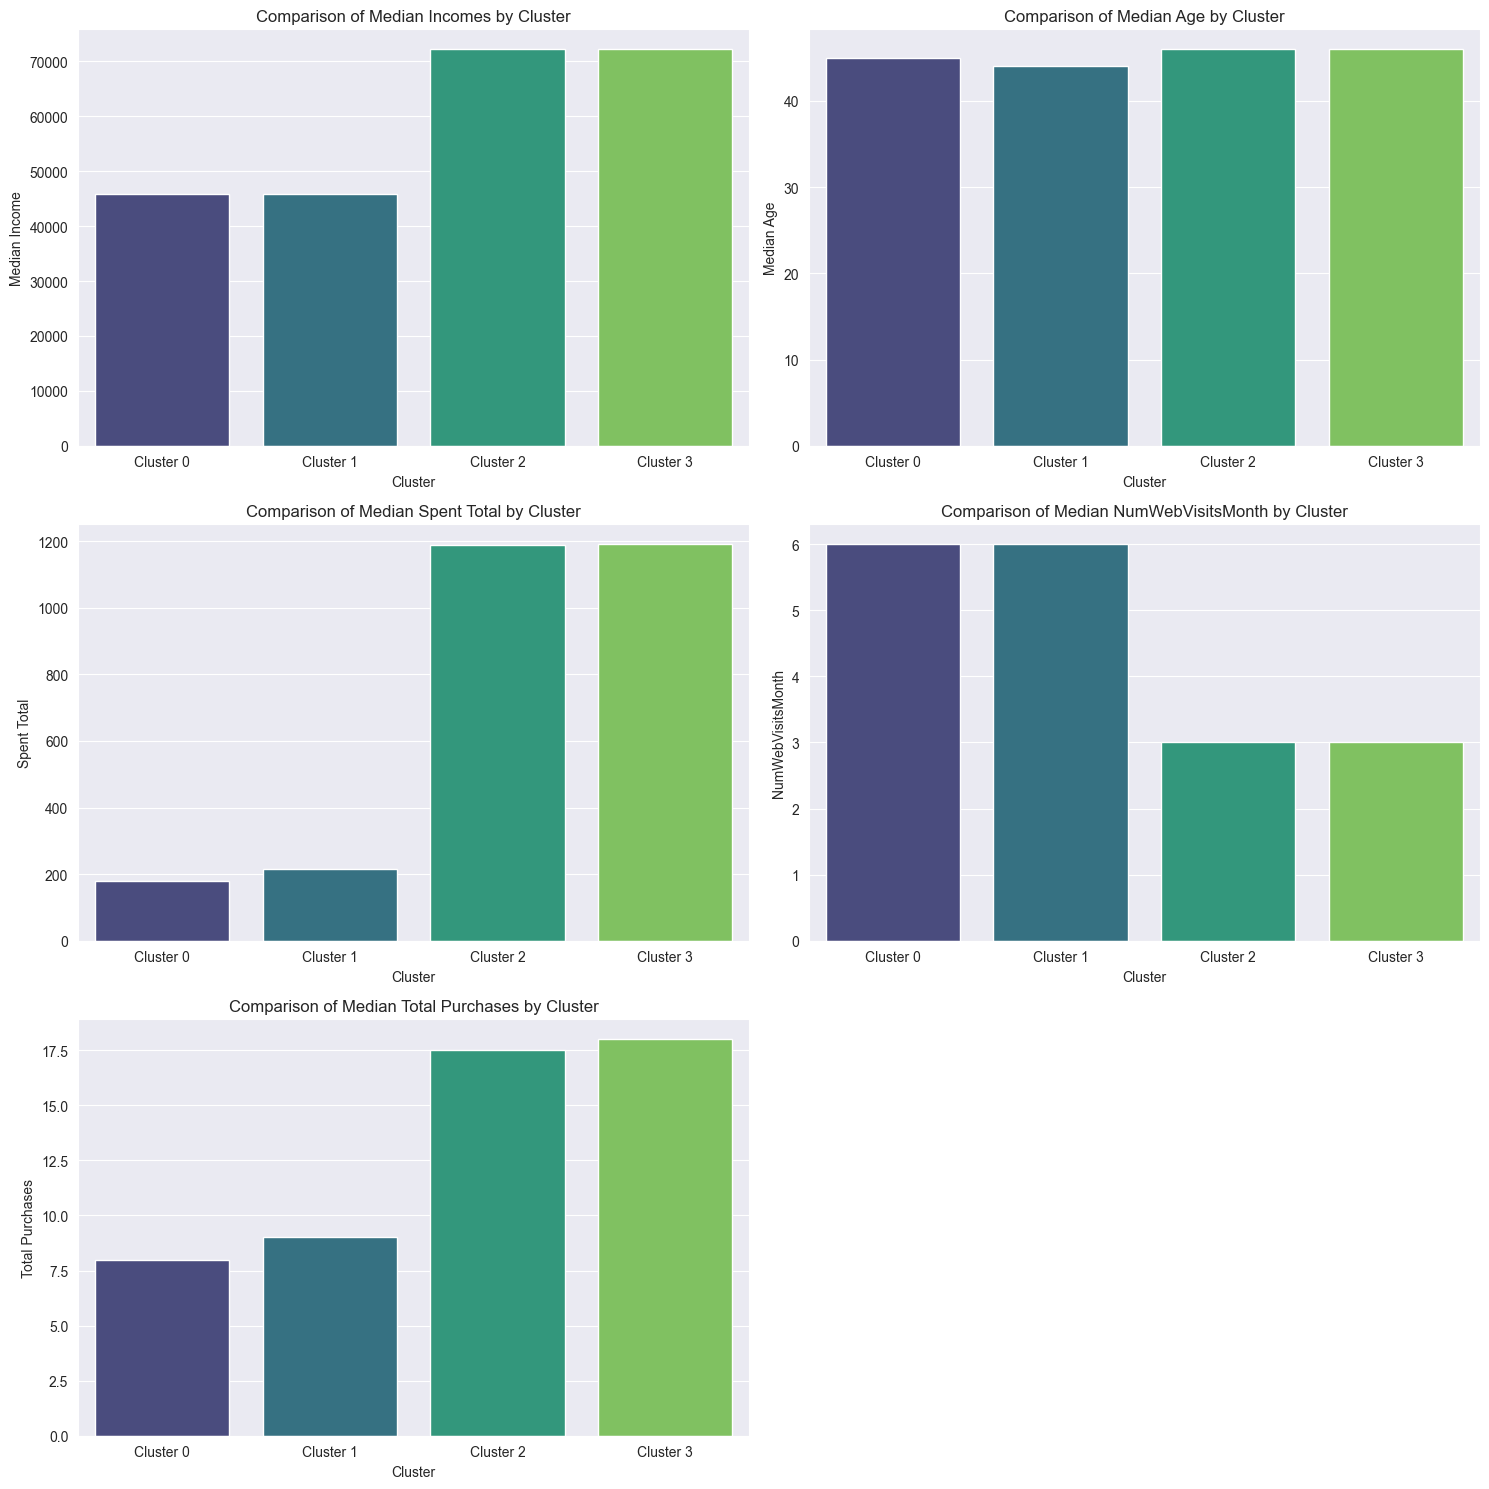

In [252]:
income_medians_df = pd.DataFrame(list(income_medians.items()), columns=['Cluster', 'Median Income'])
age_medians_df = pd.DataFrame(list(age_medians.items()), columns=['Cluster', 'Median Age'])
Spent_Total_df = pd.DataFrame(list(SpentTotal_medians.items()), columns=['Cluster', 'Median Spent Total'])
NumWebVisitsMonth_df = pd.DataFrame(list(NumWebVisitsMonth_medians.items()), columns=['Cluster', 'Median NumWebVisitsMonth'])
Total_Purchases_df = pd.DataFrame(list(Total_Purchases_medians.items()), columns=['Cluster', 'Median Total_Purchases'])

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

sns.barplot(ax=axes[0, 0], x='Cluster', y='Median Income', data=income_medians_df, palette='viridis', hue='Cluster', legend=False)
axes[0, 0].set_title('Comparison of Median Incomes by Cluster')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Median Income')

sns.barplot(ax=axes[0, 1], x='Cluster', y='Median Age', data=age_medians_df, palette='viridis', hue='Cluster', legend=False)
axes[0, 1].set_title('Comparison of Median Age by Cluster')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Median Age')

sns.barplot(ax=axes[1, 0], x='Cluster', y='Median Spent Total', data=Spent_Total_df, palette='viridis', hue='Cluster', legend=False)
axes[1, 0].set_title('Comparison of Median Spent Total by Cluster')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Spent Total')

sns.barplot(ax=axes[1, 1], x='Cluster', y='Median NumWebVisitsMonth', data=NumWebVisitsMonth_df, palette='viridis', hue='Cluster', legend=False)
axes[1, 1].set_title('Comparison of Median NumWebVisitsMonth by Cluster')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('NumWebVisitsMonth')

sns.barplot(ax=axes[2, 0], x='Cluster', y='Median Total_Purchases', data=Total_Purchases_df, palette='viridis', hue='Cluster', legend=False)
axes[2, 0].set_title('Comparison of Median Total Purchases by Cluster')
axes[2, 0].set_xlabel('Cluster')
axes[2, 0].set_ylabel('Total Purchases')

# Leave the last subplot empty
axes[2, 1].axis('off')

plt.tight_layout()

plt.savefig('OverviewBarChart.png')
plt.show()


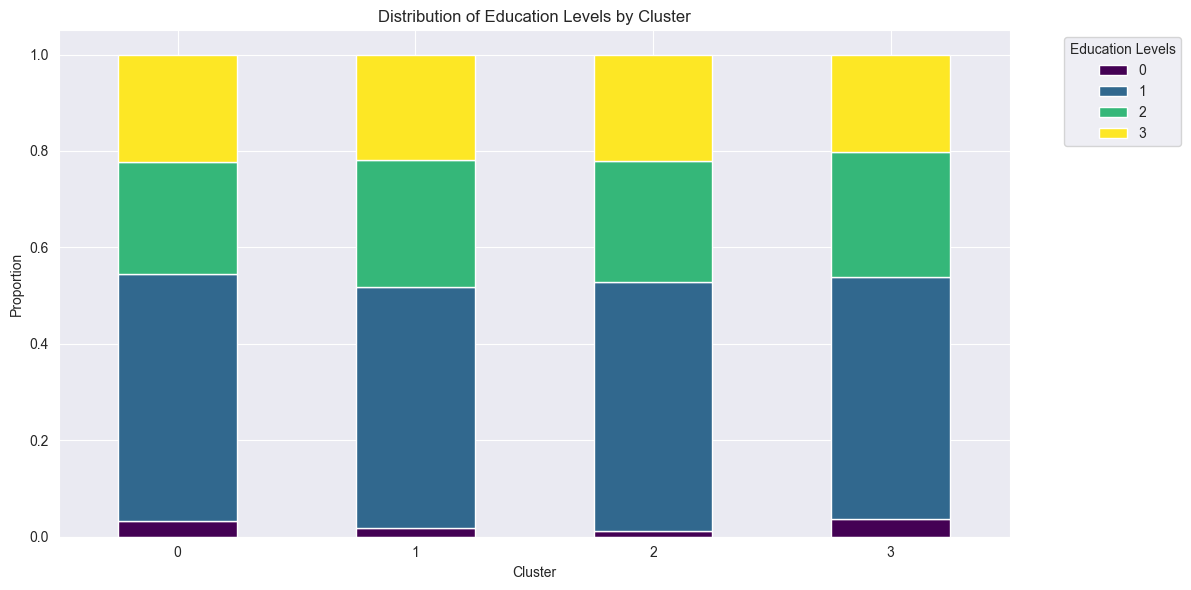

In [253]:
# Create a DataFrame to hold the count of each education level within each cluster
education_counts = data_kmeans.groupby(['Cluster', 'Edu_Categories']).size().reset_index(name='Count')

# Pivot the data to create a DataFrame suitable for a stacked bar plot
education_pivot = education_counts.pivot(index='Cluster', columns='Edu_Categories', values='Count').fillna(0)

# Normalize to get proportions
education_pivot = education_pivot.div(education_pivot.sum(axis=1), axis=0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Stacked bar plot
education_pivot.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

# Adding titles and labels
ax.set_title('Distribution of Education Levels by Cluster')
ax.set_xlabel('Cluster')
ax.set_ylabel('Proportion')

# Setting x labels to be readable
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Adding legend
ax.legend(title='Education Levels', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.savefig('EducationBarChart.png')
plt.show()

In [254]:
# Create a DataFrame to hold the count of each education level within each cluster
education_counts = data_kmeans.groupby(['Cluster', 'Edu_Categories']).size().reset_index(name='Count')

# Pivot the data to make it more readable
education_pivot = education_counts.pivot(index='Cluster', columns='Edu_Categories', values='Count').fillna(0)

# Print the cardinality
print(education_pivot)


Edu_Categories   0    1    2    3
Cluster                          
0               17  272  123  118
1               20  521  277  228
2                3  129   63   55
3               14  192   99   77


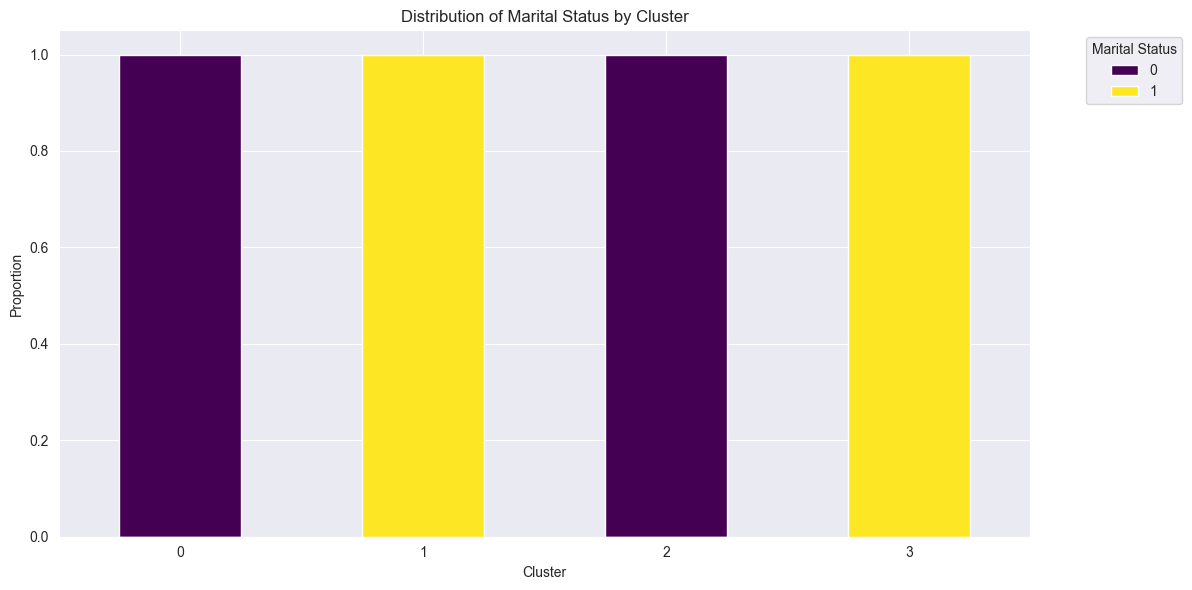

In [255]:
# Create a DataFrame to hold the count of each education level within each cluster
Marital_counts = data_kmeans.groupby(['Cluster', 'Marital_Categories']).size().reset_index(name='Count')

# Pivot the data to create a DataFrame suitable for a stacked bar plot
Marital_pivot = Marital_counts.pivot(index='Cluster', columns='Marital_Categories', values='Count').fillna(0)

# Normalize to get proportions
Marital_pivot = Marital_pivot.div(Marital_pivot.sum(axis=1), axis=0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Stacked bar plot
Marital_pivot.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

# Adding titles and labels
ax.set_title('Distribution of Marital Status by Cluster')
ax.set_xlabel('Cluster')
ax.set_ylabel('Proportion')

# Setting x labels to be readable
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Adding legend
ax.legend(title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.savefig('MaritalBarChart.png')
plt.show()


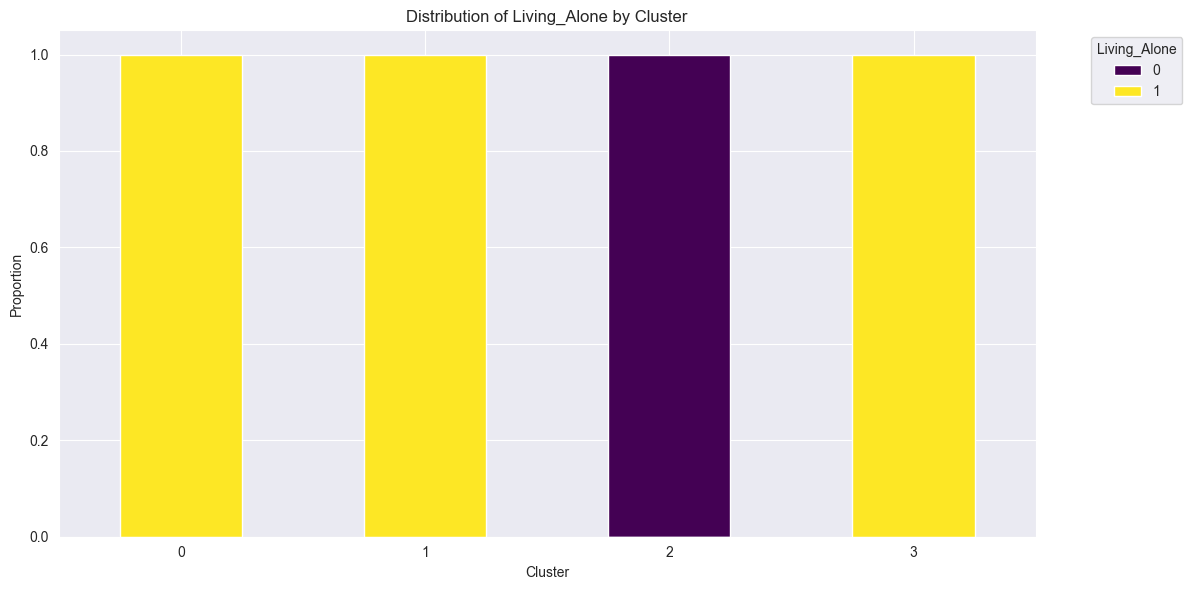

In [256]:
# Create a DataFrame to hold the count of each education level within each cluster
Living_Alone_counts = data_kmeans.groupby(['Cluster', 'Living_Alone']).size().reset_index(name='Count')

# Pivot the data to create a DataFrame suitable for a stacked bar plot
Living_Alone_pivot = Living_Alone_counts.pivot(index='Cluster', columns='Living_Alone', values='Count').fillna(0)

# Normalize to get proportions
Living_Alone_pivot = Living_Alone_pivot.div(Living_Alone_pivot.sum(axis=1), axis=0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Stacked bar plot
Living_Alone_pivot.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

# Adding titles and labels
ax.set_title('Distribution of Living_Alone by Cluster')
ax.set_xlabel('Cluster')
ax.set_ylabel('Proportion')

# Setting x labels to be readable
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Adding legend
ax.legend(title='Living_Alone', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.savefig('Living_AloneBarChart.png')
plt.show()


In [257]:
import pandas as pd

# Assuming your data is in a DataFrame called data_kmeans and it has columns 'Cluster' and 'Marital_Categories'
# Create a DataFrame to hold the mean of the binary feature within each cluster
binary_means = data_kmeans.groupby('Cluster')['Marital_Categories'].mean().reset_index()

# Convert the means to binary (0 or 1)
binary_means['Marital_Categories'] = binary_means['Marital_Categories'].apply(lambda x: 1 if x > 0 else 0)

# Display the table
print(binary_means)


   Cluster  Marital_Categories
0        0                   0
1        1                   1
2        2                   0
3        3                   1


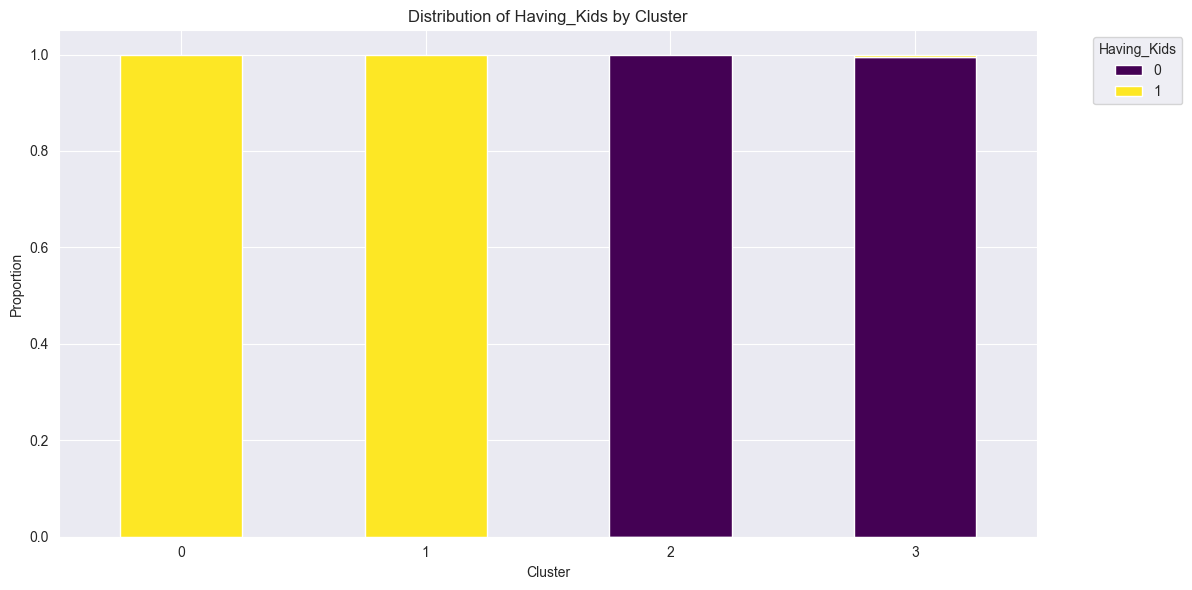

In [258]:
# Create a DataFrame to hold the count of each education level within each cluster
Having_Kids_counts = data_kmeans.groupby(['Cluster', 'Having_Kids']).size().reset_index(name='Count')

# Pivot the data to create a DataFrame suitable for a stacked bar plot
Having_Kids_pivot = Having_Kids_counts.pivot(index='Cluster', columns='Having_Kids', values='Count').fillna(0)

# Normalize to get proportions
Having_Kids_pivot = Having_Kids_pivot.div(Having_Kids_pivot.sum(axis=1), axis=0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Stacked bar plot
Having_Kids_pivot.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

# Adding titles and labels
ax.set_title('Distribution of Having_Kids by Cluster')
ax.set_xlabel('Cluster')
ax.set_ylabel('Proportion')

# Setting x labels to be readable
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Adding legend
ax.legend(title='Having_Kids', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.savefig('Having_KidsBarChart.png')
plt.show()


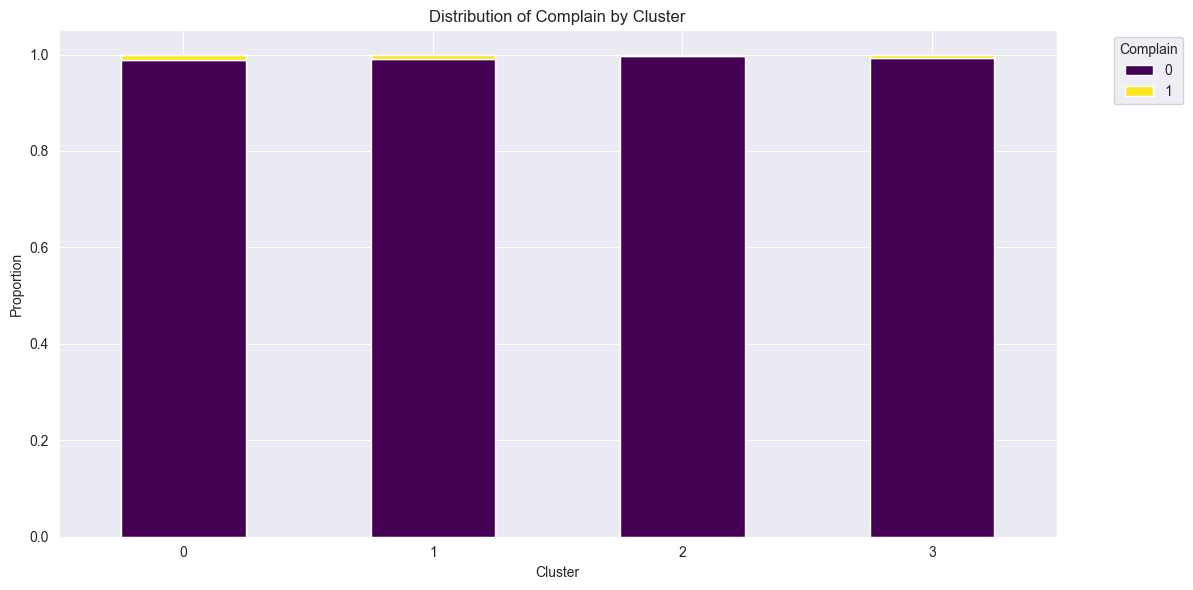

In [259]:
# Create a DataFrame to hold the count of each education level within each cluster
Complain_counts = data_kmeans.groupby(['Cluster', 'Complain']).size().reset_index(name='Count')

# Pivot the data to create a DataFrame suitable for a stacked bar plot
Complain_pivot = Complain_counts.pivot(index='Cluster', columns='Complain', values='Count').fillna(0)

# Normalize to get proportions
Complain_pivot = Complain_pivot.div(Complain_pivot.sum(axis=1), axis=0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Stacked bar plot
Complain_pivot.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

# Adding titles and labels
ax.set_title('Distribution of Complain by Cluster')
ax.set_xlabel('Cluster')
ax.set_ylabel('Proportion')

# Setting x labels to be readable
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Adding legend
ax.legend(title='Complain', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.savefig('ComplainBar.png')
plt.show()


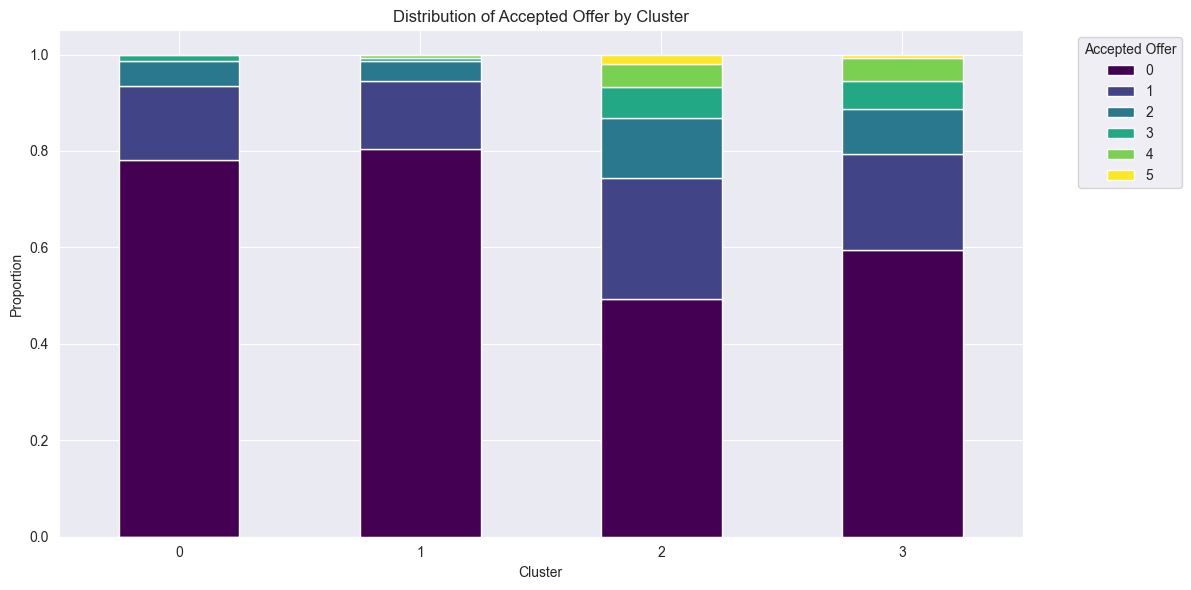

In [260]:
# Create a DataFrame to hold the count of each education level within each cluster
AcceptedOffer_counts = data_kmeans.groupby(['Cluster', 'AcceptedOffer']).size().reset_index(name='Count')

# Pivot the data to create a DataFrame suitable for a stacked bar plot
AcceptedOffer_pivot = AcceptedOffer_counts.pivot(index='Cluster', columns='AcceptedOffer', values='Count').fillna(0)

# Normalize to get proportions
AcceptedOffer_pivot = AcceptedOffer_pivot.div(AcceptedOffer_pivot.sum(axis=1), axis=0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Stacked bar plot
AcceptedOffer_pivot.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

# Adding titles and labels
ax.set_title('Distribution of Accepted Offer by Cluster')
ax.set_xlabel('Cluster')
ax.set_ylabel('Proportion')

# Setting x labels to be readable
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Adding legend
ax.legend(title='Accepted Offer', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.savefig('AcceptedOffer_pivot.png')
plt.show()

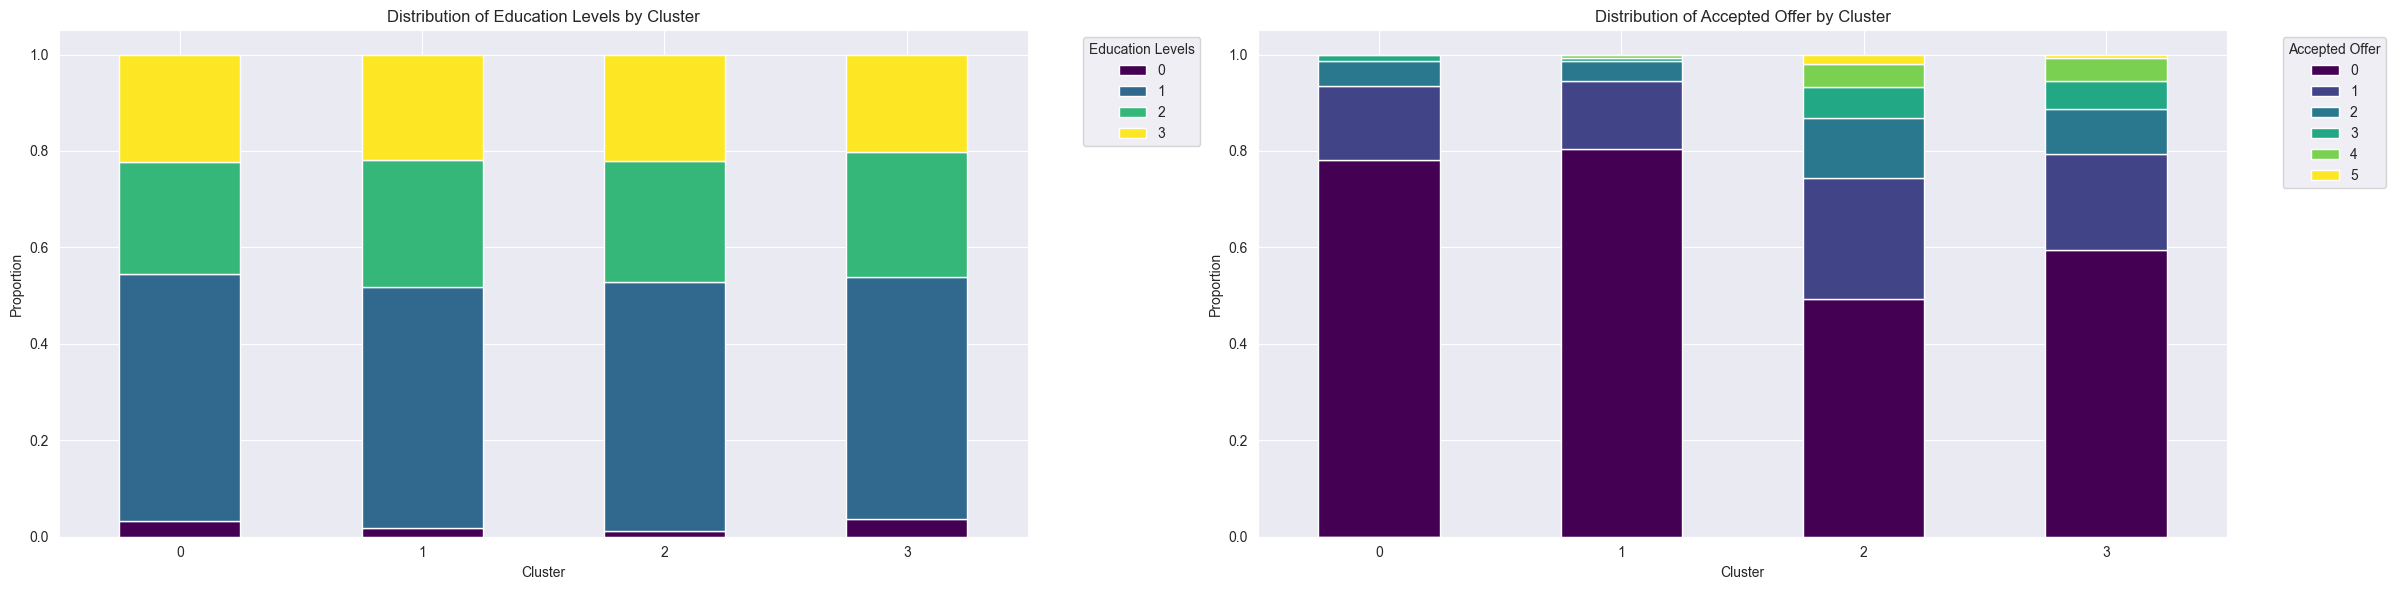

In [261]:
import matplotlib.pyplot as plt

# Create a DataFrame to hold the count of each education level within each cluster
education_counts = data_kmeans.groupby(['Cluster', 'Edu_Categories']).size().reset_index(name='Count')

# Pivot the data to create a DataFrame suitable for a stacked bar plot
education_pivot = education_counts.pivot(index='Cluster', columns='Edu_Categories', values='Count').fillna(0)

# Normalize to get proportions
education_pivot = education_pivot.div(education_pivot.sum(axis=1), axis=0)

# Create a DataFrame to hold the count of each accepted offer within each cluster
AcceptedOffer_counts = data_kmeans.groupby(['Cluster', 'AcceptedOffer']).size().reset_index(name='Count')

# Pivot the data to create a DataFrame suitable for a stacked bar plot
AcceptedOffer_pivot = AcceptedOffer_counts.pivot(index='Cluster', columns='AcceptedOffer', values='Count').fillna(0)

# Normalize to get proportions
AcceptedOffer_pivot = AcceptedOffer_pivot.div(AcceptedOffer_pivot.sum(axis=1), axis=0)

# Plotting in a 1x2 grid
fig, axs = plt.subplots(1, 2, figsize=(24, 6))

# Stacked bar plot for education levels
education_pivot.plot(kind='bar', stacked=True, ax=axs[0], colormap='viridis')
axs[0].set_title('Distribution of Education Levels by Cluster')
axs[0].set_xlabel('Cluster')
axs[0].set_ylabel('Proportion')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=0)
axs[0].legend(title='Education Levels', bbox_to_anchor=(1.05, 1), loc='upper left')

# Stacked bar plot for accepted offers
AcceptedOffer_pivot.plot(kind='bar', stacked=True, ax=axs[1], colormap='viridis')
axs[1].set_title('Distribution of Accepted Offer by Cluster')
axs[1].set_xlabel('Cluster')
axs[1].set_ylabel('Proportion')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=0)
axs[1].legend(title='Accepted Offer', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('AcceptedOffer+EducationOverview.png')
# Show the plots
plt.show()


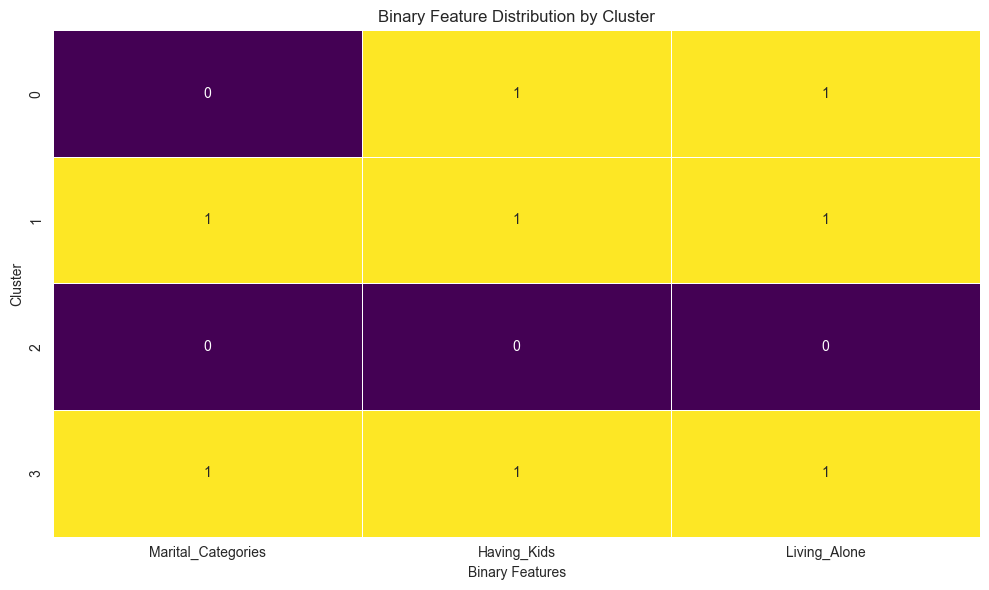

In [262]:
binary_features = ['Marital_Categories', 'Having_Kids', 'Living_Alone']

# Create a DataFrame to hold the mean of the binary features within each cluster
binary_means = data_kmeans.groupby('Cluster')[binary_features].mean().reset_index()

# Convert the means to binary (0 or 1)
binary_means[binary_features] = binary_means[binary_features].map(lambda x: 1 if x > 0 else 0)

# Set the 'Cluster' column as the index
binary_means.set_index('Cluster', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(binary_means, annot=True, cmap='viridis', cbar=False, linewidths=.5)

# Adding titles and labels
plt.title('Binary Feature Distribution by Cluster')
plt.xlabel('Binary Features')
plt.ylabel('Cluster')

# Show the plot
plt.tight_layout()
#plt.savefig('RelationshipLivingSituationHeatmap.png')
plt.show()


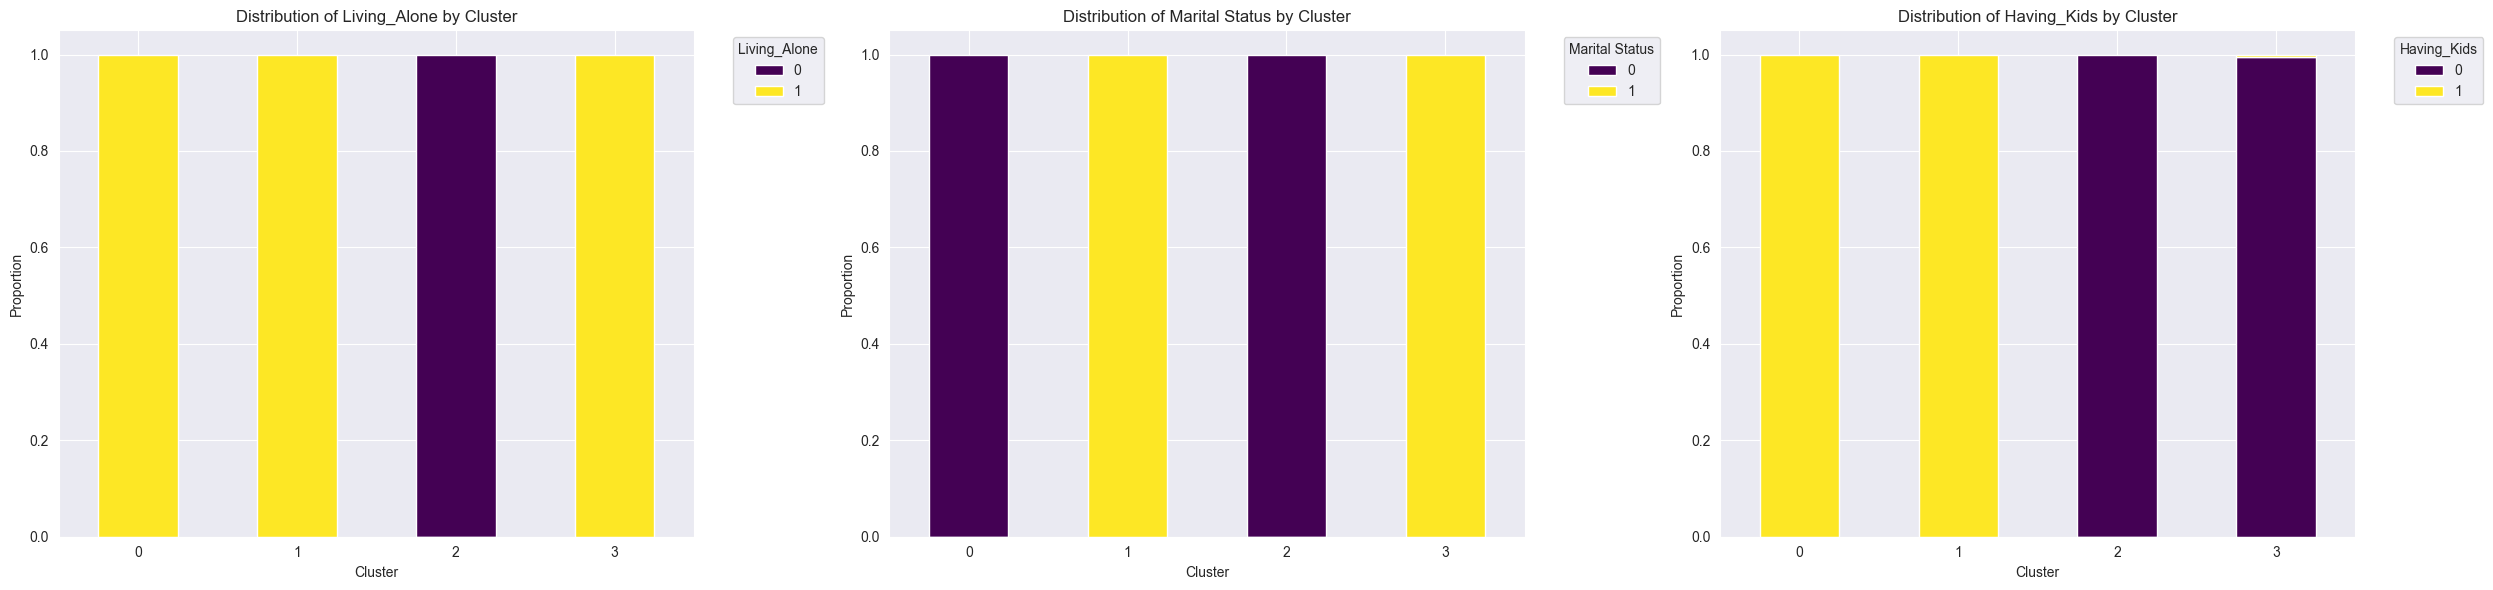

In [263]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrames to hold the counts for each binary feature within each cluster
Living_Alone_counts = data_kmeans.groupby(['Cluster', 'Living_Alone']).size().reset_index(name='Count')
Marital_counts = data_kmeans.groupby(['Cluster', 'Marital_Categories']).size().reset_index(name='Count')
Having_Kids_counts = data_kmeans.groupby(['Cluster', 'Having_Kids']).size().reset_index(name='Count')

# Pivot the data to create DataFrames suitable for stacked bar plots
Living_Alone_pivot = Living_Alone_counts.pivot(index='Cluster', columns='Living_Alone', values='Count').fillna(0)
Marital_pivot = Marital_counts.pivot(index='Cluster', columns='Marital_Categories', values='Count').fillna(0)
Having_Kids_pivot = Having_Kids_counts.pivot(index='Cluster', columns='Having_Kids', values='Count').fillna(0)

# Normalize to get proportions
Living_Alone_pivot = Living_Alone_pivot.div(Living_Alone_pivot.sum(axis=1), axis=0)
Marital_pivot = Marital_pivot.div(Marital_pivot.sum(axis=1), axis=0)
Having_Kids_pivot = Having_Kids_pivot.div(Having_Kids_pivot.sum(axis=1), axis=0)

# Set up the subplots
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

# Plotting the stacked bar plots
Living_Alone_pivot.plot(kind='bar', stacked=True, ax=axes[0], colormap='viridis')
axes[0].set_title('Distribution of Living_Alone by Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].legend(title='Living_Alone', bbox_to_anchor=(1.05, 1), loc='upper left')

Marital_pivot.plot(kind='bar', stacked=True, ax=axes[1], colormap='viridis')
axes[1].set_title('Distribution of Marital Status by Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Proportion')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].legend(title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')

Having_Kids_pivot.plot(kind='bar', stacked=True, ax=axes[2], colormap='viridis')
axes[2].set_title('Distribution of Having_Kids by Cluster')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Proportion')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=0)
axes[2].legend(title='Having_Kids', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.savefig('RelationsshipOverview.png')
plt.show()


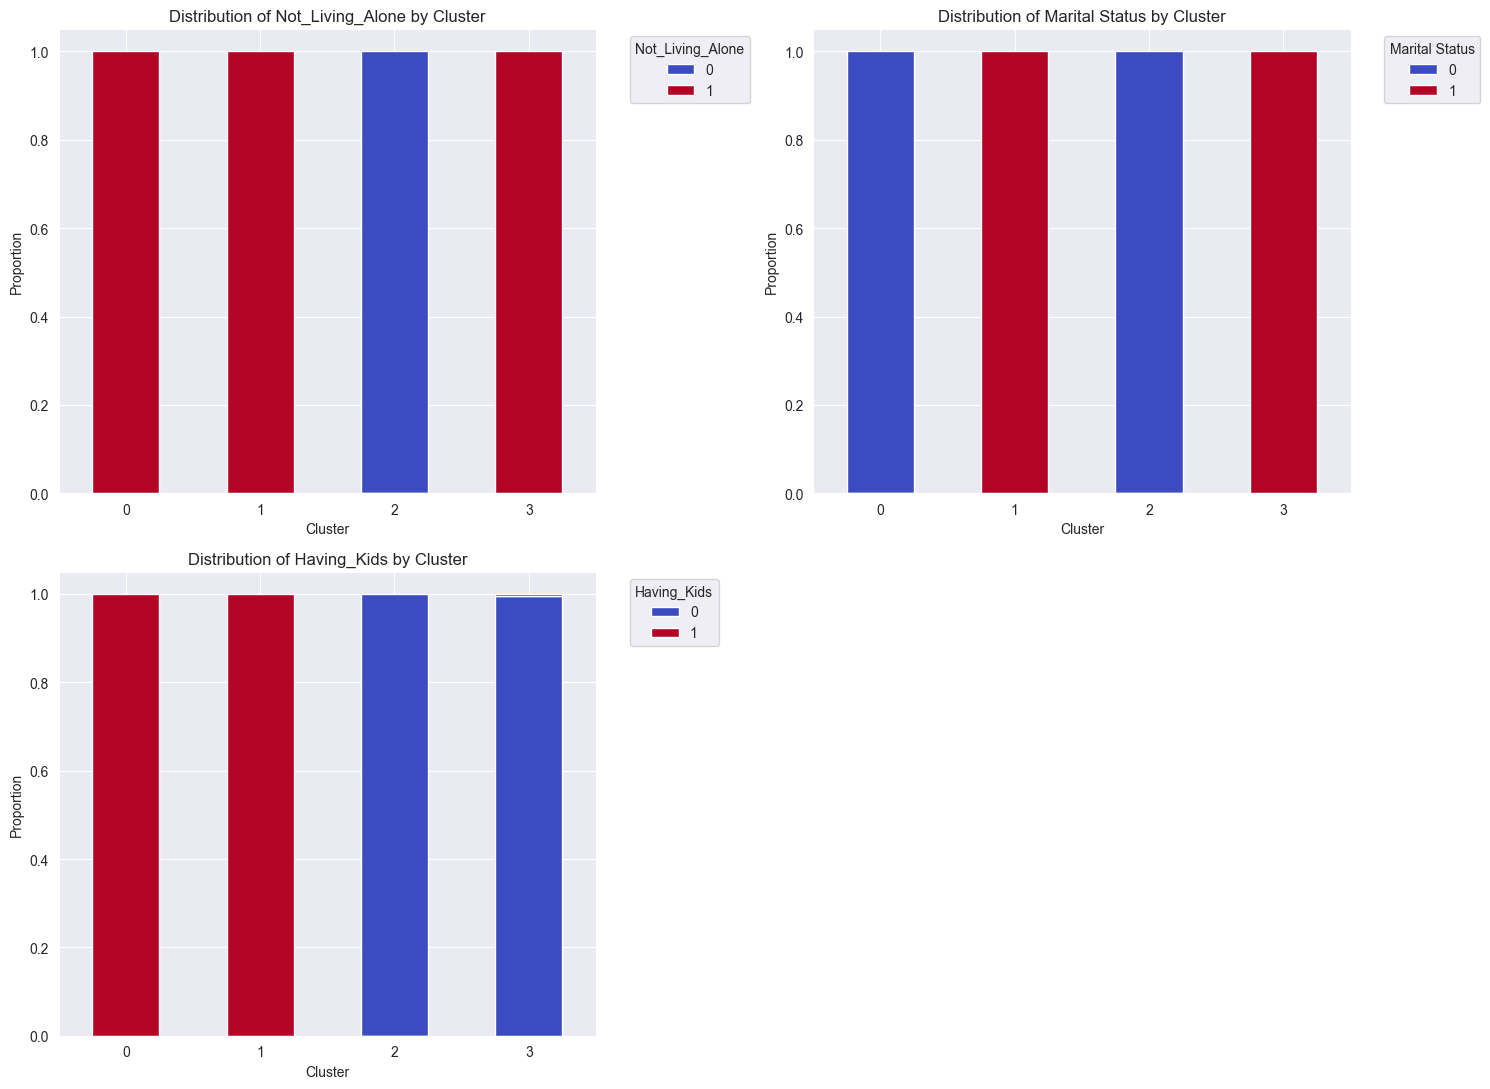

In [340]:
# Create DataFrames to hold the counts for each binary feature within each cluster
Living_Alone_counts = data_kmeans.groupby(['Cluster', 'Living_Alone']).size().reset_index(name='Count')
Marital_counts = data_kmeans.groupby(['Cluster', 'Marital_Categories']).size().reset_index(name='Count')
Having_Kids_counts = data_kmeans.groupby(['Cluster', 'Having_Kids']).size().reset_index(name='Count')

# Pivot the data to create DataFrames suitable for stacked bar plots
Living_Alone_pivot = Living_Alone_counts.pivot(index='Cluster', columns='Living_Alone', values='Count').fillna(0)
Marital_pivot = Marital_counts.pivot(index='Cluster', columns='Marital_Categories', values='Count').fillna(0)
Having_Kids_pivot = Having_Kids_counts.pivot(index='Cluster', columns='Having_Kids', values='Count').fillna(0)

# Normalize to get proportions
Living_Alone_pivot = Living_Alone_pivot.div(Living_Alone_pivot.sum(axis=1), axis=0)
Marital_pivot = Marital_pivot.div(Marital_pivot.sum(axis=1), axis=0)
Having_Kids_pivot = Having_Kids_pivot.div(Having_Kids_pivot.sum(axis=1), axis=0)

# Set up the subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 11))

# Plotting the stacked bar plots
Living_Alone_pivot.plot(kind='bar', stacked=True, ax=axes[0, 0], colormap='coolwarm')
axes[0, 0].set_title('Distribution of Not_Living_Alone by Cluster')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Proportion')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)
axes[0, 0].legend(title='Not_Living_Alone', bbox_to_anchor=(1.05, 1), loc='upper left')

Marital_pivot.plot(kind='bar', stacked=True, ax=axes[0, 1], colormap='coolwarm')
axes[0, 1].set_title('Distribution of Marital Status by Cluster')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Proportion')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)
axes[0, 1].legend(title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left', )

Having_Kids_pivot.plot(kind='bar', stacked=True, ax=axes[1, 0], colormap='coolwarm')
axes[1, 0].set_title('Distribution of Having_Kids by Cluster')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Proportion')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)
axes[1, 0].legend(title='Having_Kids', bbox_to_anchor=(1.05, 1), loc='upper left')

# Leave the last subplot empty
axes[1, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.savefig('RelationshipOverview.png')
plt.show()


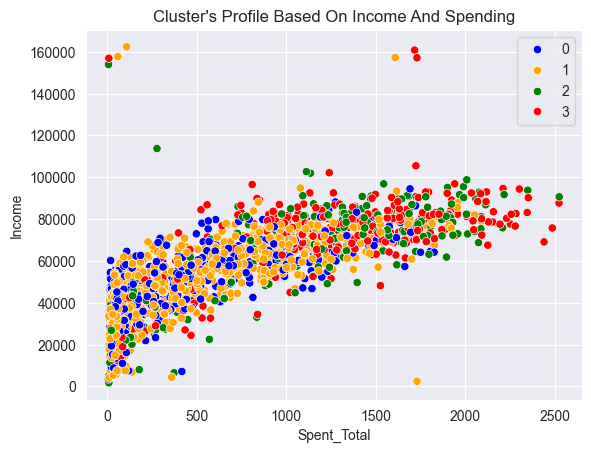

In [265]:
palette = {-1: 'gray', 0: 'blue', 1: 'orange', 2: 'green', 3: 'red'}
pl = sns.scatterplot(data = data_kmeans,x=data_kmeans["Spent_Total"], y=data["Income"],hue=data_kmeans["Cluster"], palette=palette )
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

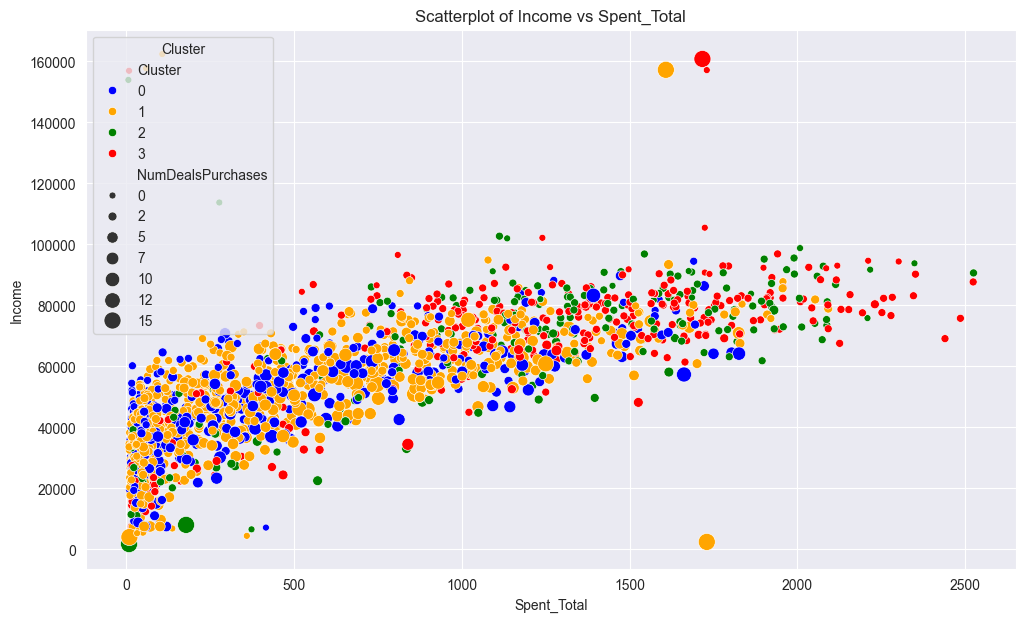

In [299]:
palette = {-1: 'gray', 0: 'blue', 1: 'orange', 2: 'green', 3: 'red'}
# Plotting
# Verify the conversion
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Spent_Total', y='Income', hue='Cluster', data=data_kmeans, palette=palette, size='NumDealsPurchases', sizes=(25, 150))
plt.title('Scatterplot of Income vs Spent_Total')
plt.xlabel('Spent_Total')
plt.ylabel('Income')
plt.legend(title='Cluster')
plt.savefig('DealsIncomeSpentTotalScatter.png')
plt.show()

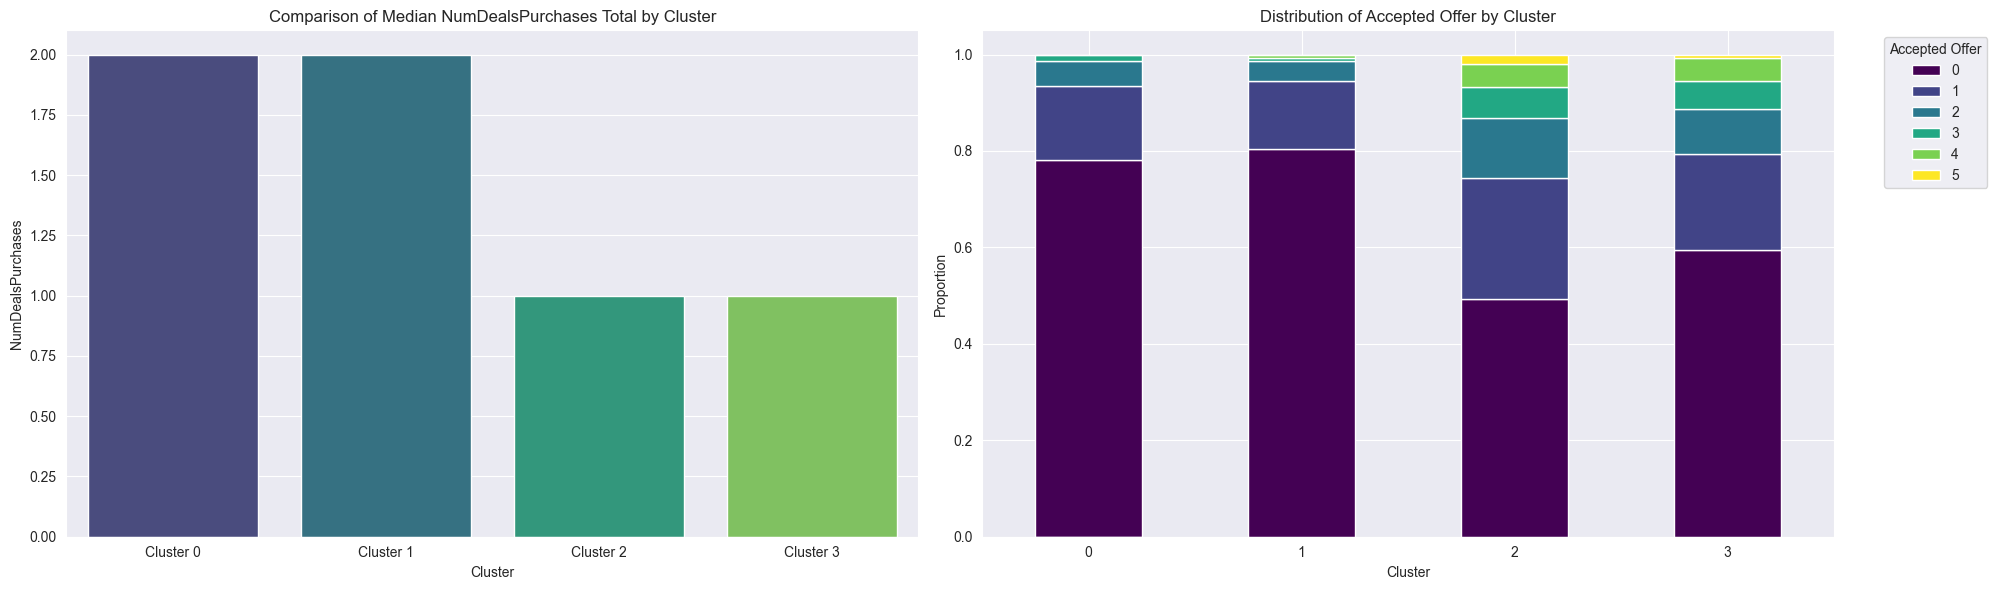

In [284]:
# Data preparation for NumDealsPurchases
NumDealsPurchases_df = pd.DataFrame(list(NumDealsPurchases_medians.items()), columns=['Cluster', 'Median NumDealsPurchases'])

# Data preparation for AcceptedOffer
AcceptedOffer_counts = data_kmeans.groupby(['Cluster', 'AcceptedOffer']).size().reset_index(name='Count')
AcceptedOffer_pivot = AcceptedOffer_counts.pivot(index='Cluster', columns='AcceptedOffer', values='Count').fillna(0)
AcceptedOffer_pivot = AcceptedOffer_pivot.div(AcceptedOffer_pivot.sum(axis=1), axis=0)

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot 1: Barplot of Median NumDealsPurchases by Cluster
sns.barplot(x='Cluster', y='Median NumDealsPurchases', data=NumDealsPurchases_df, palette='viridis', hue='Cluster', legend=False, ax=axes[0])
axes[0].set_title('Comparison of Median NumDealsPurchases Total by Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('NumDealsPurchases')
# Plot 2: Stacked bar plot of Accepted Offer by Cluster
AcceptedOffer_pivot.plot(kind='bar', stacked=True, ax=axes[1], colormap='viridis')
axes[1].set_title('Distribution of Accepted Offer by Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Proportion')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].legend(title='Accepted Offer', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plots
plt.tight_layout()
plt.savefig('CampaignOverview.png')
plt.show()


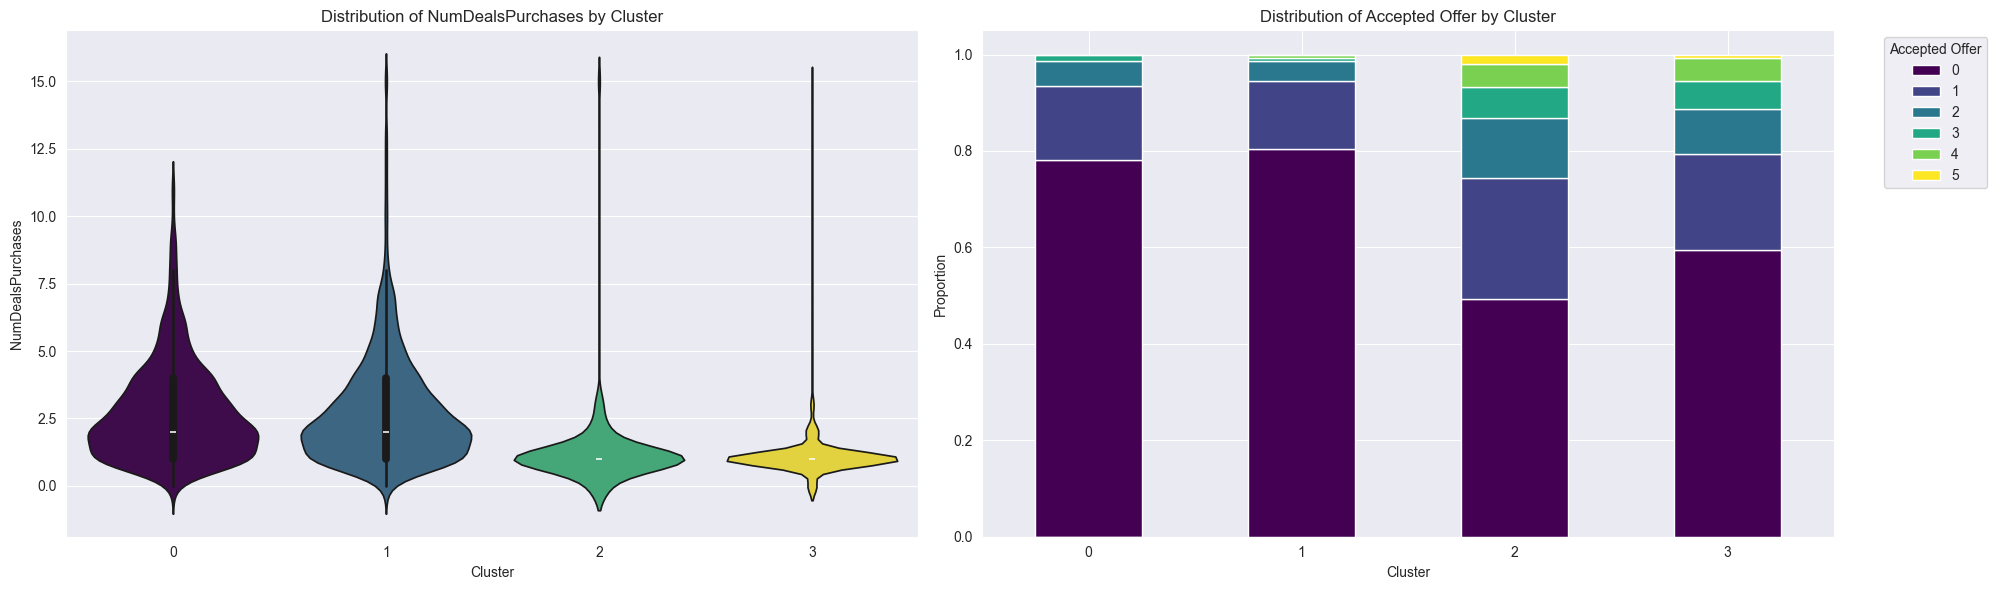

In [288]:
# Data preparation for NumDealsPurchases
# Use the full dataset with 'Cluster' and 'NumDealsPurchases'
NumDealsPurchases_full_df = data_kmeans[['Cluster', 'NumDealsPurchases']]

# Data preparation for AcceptedOffer
AcceptedOffer_counts = data_kmeans.groupby(['Cluster', 'AcceptedOffer']).size().reset_index(name='Count')
AcceptedOffer_pivot = AcceptedOffer_counts.pivot(index='Cluster', columns='AcceptedOffer', values='Count').fillna(0)
AcceptedOffer_pivot = AcceptedOffer_pivot.div(AcceptedOffer_pivot.sum(axis=1), axis=0)

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot 1: Violinplot of NumDealsPurchases by Cluster
sns.violinplot(x='Cluster', y='NumDealsPurchases', data=NumDealsPurchases_full_df, palette='viridis', hue='Cluster', legend=False, ax=axes[0])
axes[0].set_title('Distribution of NumDealsPurchases by Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('NumDealsPurchases')

# Plot 2: Stacked bar plot of Accepted Offer by Cluster
AcceptedOffer_pivot.plot(kind='bar', stacked=True, ax=axes[1], colormap='viridis')
axes[1].set_title('Distribution of Accepted Offer by Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Proportion')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].legend(title='Accepted Offer', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plots
plt.tight_layout()
plt.savefig('CampaignOverview.png')
plt.show()


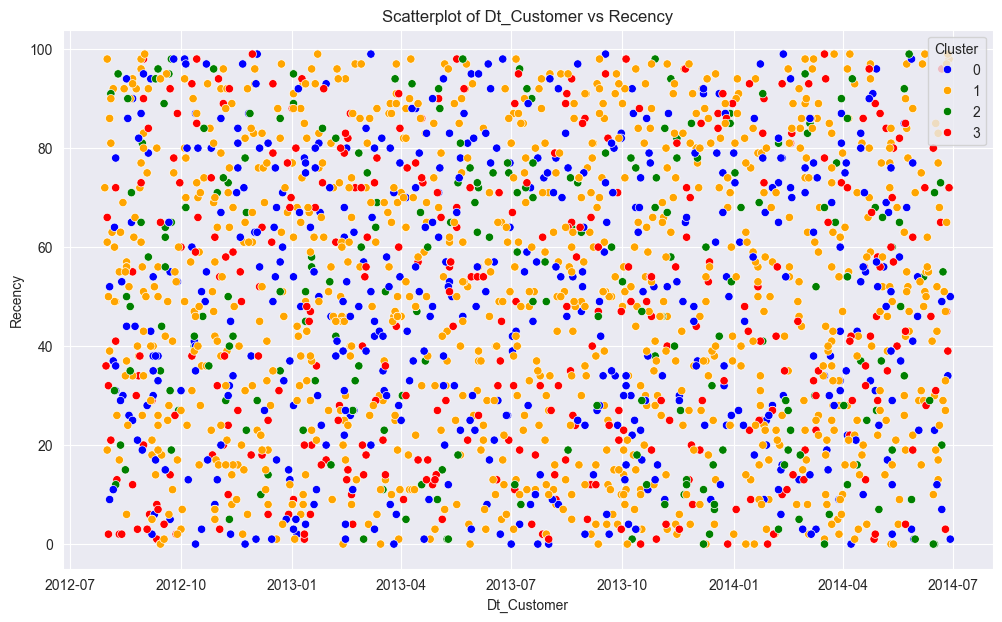

In [305]:
palette = {-1: 'gray', 0: 'blue', 1: 'orange', 2: 'green', 3: 'red'}
# Plotting
# Verify the conversion
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Dt_Customer', y='Recency', hue='Cluster', data=data_kmeans, palette=palette)
plt.title('Scatterplot of Dt_Customer vs Recency')
plt.xlabel('Dt_Customer')
plt.ylabel('Recency')
plt.legend(title='Cluster')
plt.show()

In [328]:
outliers_info = data_combined.loc[outlier_indices]
outliers_df = pd.DataFrame(outliers_info)
outliers_df.head()

,ID,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Marital_Categories,Edu_Categories,Spent_Total,Living_Alone,Having_Kids,AcceptedOffer,Total_Purchases,Cluster,Cluster_DBSCAN,Cluster_KMeans
908,8931,83033.0,735371,82,812,99,431,237,149,33,...,1,1,1761,1,1,1,25,3,3,3
994,5236,77568.0,734740,30,1230,0,396,232,178,158,...,1,1,2194,1,1,3,20,3,3,3
